In [23]:
import numpy as np
import pandas as pd
import os
import seaborn as sb
import matplotlib.pyplot as plt

# Read CSV Files
### List of all CSV files

In [24]:
print('### All DataFrames ###')
for idx, file in enumerate(os.listdir('cleaned-dataframes')):
    print(idx, '-', file)

### All DataFrames ###
0 - customerData.csv
1 - leadData.csv
2 - orderData.csv
3 - productData.csv
4 - sellerData.csv


### Read to `DataFrames`

In [25]:
customerData = pd.read_csv('cleaned-dataframes/customerData.csv')
customerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         99441 non-null  object
 1   customer_unique_id  99441 non-null  object
 2   customer_state      99441 non-null  object
dtypes: object(3)
memory usage: 2.3+ MB


In [26]:
productData = pd.read_csv('cleaned-dataframes/productData.csv')
productData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32328 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
 9   product_volume              32949 non-null  float64
 10  product_density             32949 non-null  float64
 11  product_items_sold          32951 non-null  int64  
 12  product_rating              32951 non-null  float64
 13  product_polarity            329

In [27]:
sellerData = pd.read_csv('cleaned-dataframes/sellerData.csv')
sellerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   seller_id          3095 non-null   object
 1   seller_state       3095 non-null   object
 2   seller_items_sold  3095 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 72.7+ KB


In [28]:
leadData = pd.read_csv('cleaned-dataframes/leadData.csv')
leadData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   seller_id               380 non-null    object 
 1   business_segment        380 non-null    object 
 2   lead_type               377 non-null    object 
 3   lead_behaviour_profile  289 non-null    object 
 4   business_type           377 non-null    object 
 5   days_to_first_sale      380 non-null    float64
 6   deal_days               380 non-null    float64
dtypes: float64(2), object(5)
memory usage: 20.9+ KB


In [29]:
orderData = pd.read_csv('cleaned-dataframes/orderData.csv')
orderData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118318 entries, 0 to 118317
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              118318 non-null  object 
 1   seller_id             118318 non-null  object 
 2   product_id            118318 non-null  object 
 3   customer_id           118318 non-null  object 
 4   review_id             118318 non-null  object 
 5   order_status          118318 non-null  object 
 6   price                 118318 non-null  float64
 7   payment_type          118315 non-null  object 
 8   payment_installments  118315 non-null  float64
 9   payment_time          118303 non-null  float64
 10  lead_time             115730 non-null  float64
 11  delivery_performance  115730 non-null  float64
 12  review_time           118318 non-null  int64  
 13  review_score          118318 non-null  int64  
 14  review_en             50668 non-null   object 
 15  

## Outliers for Response 1: seller_items_sold
### extracting outliers & sellerData insights

In [30]:
sellerData["seller_items_sold"].describe()

count    3095.000000
mean       38.228756
std       125.394261
min         1.000000
25%         2.000000
50%         8.000000
75%        26.000000
max      2155.000000
Name: seller_items_sold, dtype: float64

<AxesSubplot:xlabel='seller_items_sold'>

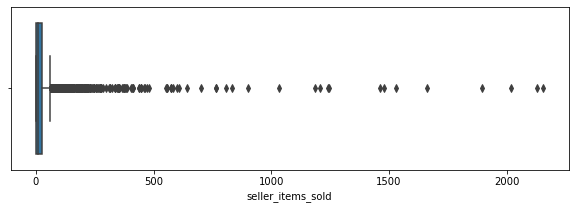

In [31]:
fig = plt.figure(figsize = (10,3))
sb.boxplot(x = "seller_items_sold", data = sellerData)

<AxesSubplot:xlabel='seller_items_sold'>

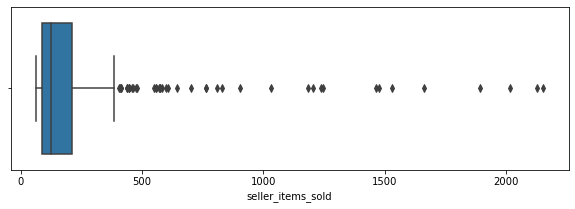

In [32]:
# 1st filter of outliers on the right side
IQR = sellerData["seller_items_sold"].quantile(.75) - sellerData["seller_items_sold"].quantile(.25)
h = sellerData["seller_items_sold"].quantile(.75) + 1.5 * IQR

outlierSellers = sellerData[sellerData["seller_items_sold"] > h]

fig = plt.figure(figsize = (10,3))
sb.boxplot(x = "seller_items_sold", data = outlierSellers)

In [33]:
# 2nd filter of outliers on the right side
IQR = outlierSellers["seller_items_sold"].quantile(.75) - outlierSellers["seller_items_sold"].quantile(.25)
h = outlierSellers["seller_items_sold"].quantile(.75) + 1.5 * IQR

outlierSellers = outlierSellers[outlierSellers["seller_items_sold"] > h]
outlierSellers

,seller_id,seller_state,seller_items_sold
242,7d13fca15225358621be4086e1eb0964,SP,598
281,9f505651f4a6abe901a56cdc21508025,SP,463
332,8b321bb669392f5163d04c59e235e066,SP,1031
390,955fee9216a65b617aa5c0531780ce60,SP,1530
474,1f50f920176fa81dab994f9023523100,SP,2017
557,fa1c13f2614d7b5c4749cbc52fecda94,SP,609
606,2138ccb85b11a4ec1e37afbd1c8eda1f,SP,447
631,391fc6631aebcf3004804e51b40bcf1e,SP,644
643,e9779976487b77c6d4ac45f75ec7afe9,SP,764
797,6560211a19b47992c3666cc44a7e94c0,SP,2130


In [34]:
# take any seller with >1000 items sold to be best-performing outliers
bestSellers = sellerData[sellerData["seller_items_sold"] > 1000]
bestSellers

,seller_id,seller_state,seller_items_sold
332,8b321bb669392f5163d04c59e235e066,SP,1031
390,955fee9216a65b617aa5c0531780ce60,SP,1530
474,1f50f920176fa81dab994f9023523100,SP,2017
797,6560211a19b47992c3666cc44a7e94c0,SP,2130
987,ea8482cd71df3c1969d7b9473ff13abc,SP,1240
1182,7c67e1448b00f6e969d365cea6b010ab,SP,1463
1413,cc419e0650a3c5ba77189a1882b7556a,SP,1893
1873,da8622b14eb17ae2831f4ac5b9dab84a,SP,1662
2207,7a67c85e85bb2ce8582c35f2203ad736,SP,1245
2345,3d871de0142ce09b7081e2b9d1733cb1,SP,1205


In [35]:
# Standard statistics summary
print("Outliers:\n", outlierSellers.describe(), end="\n\n")
print("Best:\n", bestSellers.describe())

Outliers:
        seller_items_sold
count          42.000000
mean          870.285714
std           522.591352
min           403.000000
25%           465.750000
50%           603.500000
75%          1200.250000
max          2155.000000

Best:
        seller_items_sold
count          13.000000
mean         1556.461538
std           384.433483
min          1031.000000
25%          1240.000000
50%          1477.000000
75%          1893.000000
max          2155.000000


In [36]:
# Seller States
print("Outliers:\n", outlierSellers["seller_state"].value_counts(), end="\n\n")
print("Best:\n", bestSellers["seller_state"].value_counts())

Outliers:
 SP    33
MG     3
RJ     2
PR     2
MA     1
BA     1
Name: seller_state, dtype: int64

Best:
 SP    13
Name: seller_state, dtype: int64


<AxesSubplot:xlabel='seller_items_sold', ylabel='seller_state'>

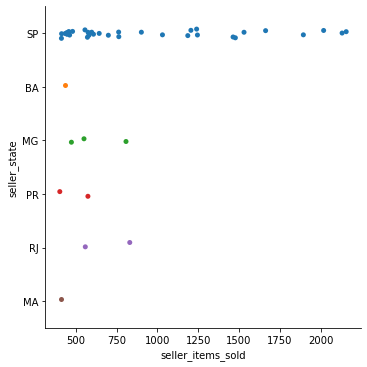

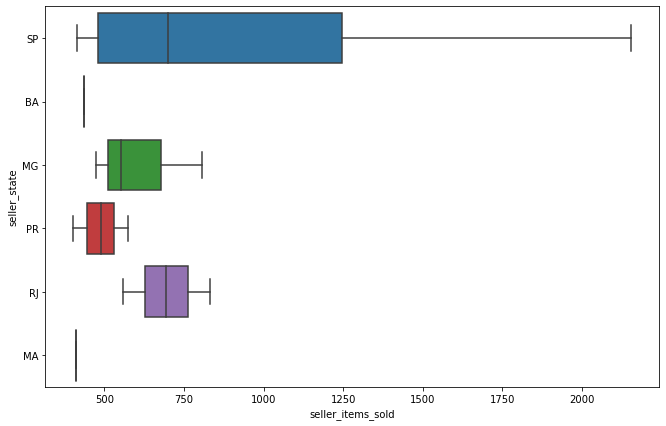

In [43]:
# outliers
sb.catplot(data = outlierSellers, x="seller_items_sold", y="seller_state")

fig = plt.figure(figsize = (11,7))
sb.boxplot(x = "seller_items_sold", y= "seller_state", data = outlierSellers)

<AxesSubplot:xlabel='seller_items_sold', ylabel='seller_state'>

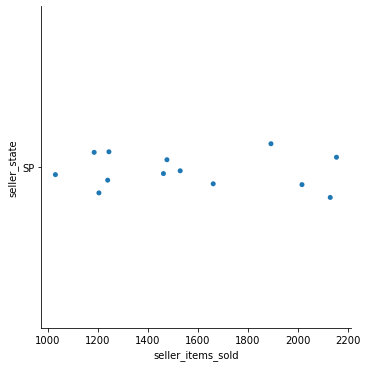

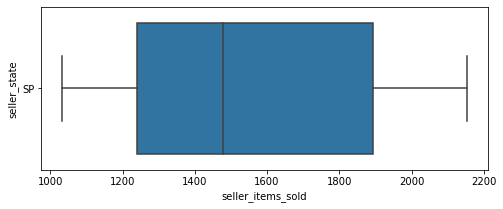

In [42]:
# best
sb.catplot(data = bestSellers, x="seller_items_sold", y="seller_state")

fig = plt.figure(figsize = (8,3))
sb.boxplot(x = "seller_items_sold", y= "seller_state", data = bestSellers)

### leadData insights

In [45]:
outlierLeads = outlierSellers.merge(leadData, on="seller_id")
outlierLeads

,seller_id,seller_state,seller_items_sold,business_segment,lead_type,lead_behaviour_profile,business_type,days_to_first_sale,deal_days
0,7d13fca15225358621be4086e1eb0964,SP,598,fashion_accessories,online_big,NaN,reseller,6.0,17.0


Only one of the well-performing sellers are also from the lead dataset, let's try get the good outliers from the lead dataset.

In [46]:
leadSellers = leadData.merge(sellerData, on="seller_id")
leadSellers["seller_items_sold"].describe()

count    380.000000
mean      13.878947
std       38.766891
min        1.000000
25%        2.000000
50%        5.000000
75%       13.000000
max      598.000000
Name: seller_items_sold, dtype: float64

<AxesSubplot:xlabel='seller_items_sold'>

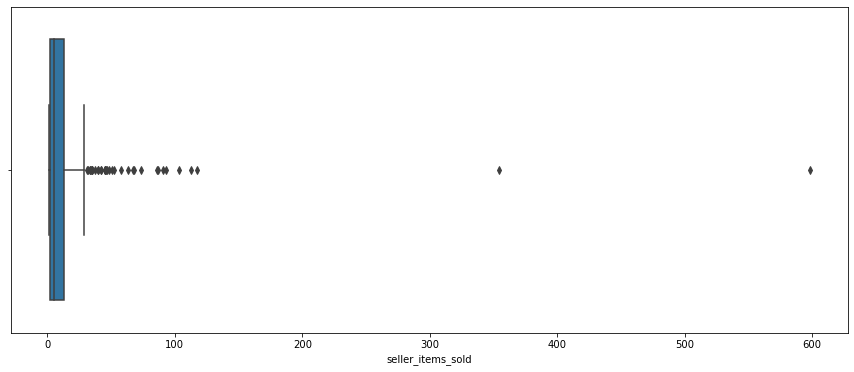

In [47]:
fig = plt.figure(figsize = (15,6))
sb.boxplot(x = "seller_items_sold", data = leadSellers)

<AxesSubplot:xlabel='seller_items_sold'>

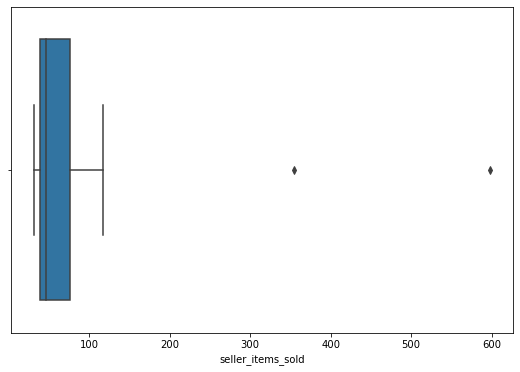

In [48]:
# outliers on the right side
IQR = leadSellers["seller_items_sold"].quantile(.75) - leadSellers["seller_items_sold"].quantile(.25)
h = leadSellers["seller_items_sold"].quantile(.75) + 1.5 * IQR

outlierLeads = leadSellers[leadSellers["seller_items_sold"] > h]

fig = plt.figure(figsize = (9,6))
sb.boxplot(x = "seller_items_sold", data = outlierLeads)

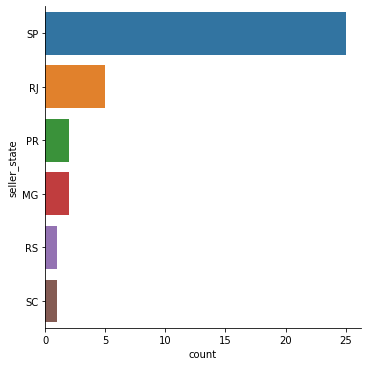

In [49]:
# Seller States
sb.catplot(data = outlierLeads, y="seller_state", kind="count", order=outlierLeads["seller_state"].value_counts().index)

<AxesSubplot:xlabel='seller_items_sold', ylabel='seller_state'>

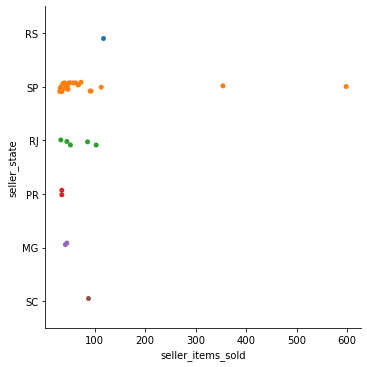

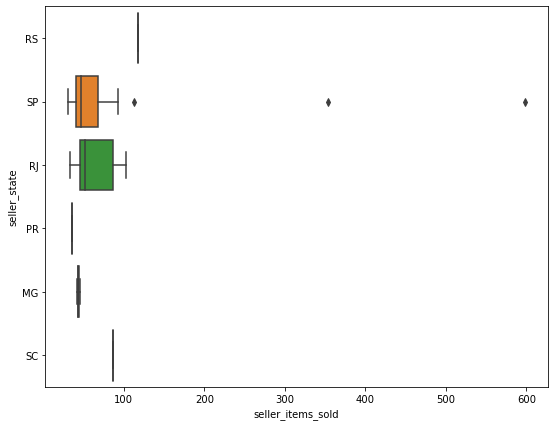

In [51]:
sb.catplot(data = outlierLeads, x="seller_items_sold", y="seller_state")

fig = plt.figure(figsize = (9,7))
sb.boxplot(x = "seller_items_sold", y= "seller_state", data = outlierLeads)

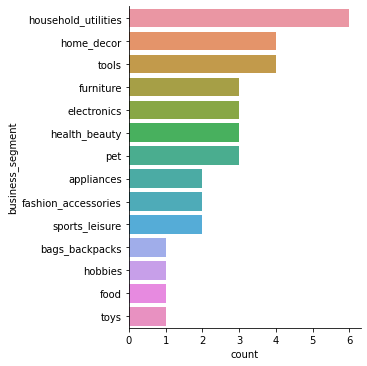

In [111]:
# Business Segment
sb.catplot(data = outlierLeads, y="business_segment", kind="count", order=outlierLeads["business_segment"].value_counts().index)

<AxesSubplot:xlabel='seller_items_sold', ylabel='business_segment'>

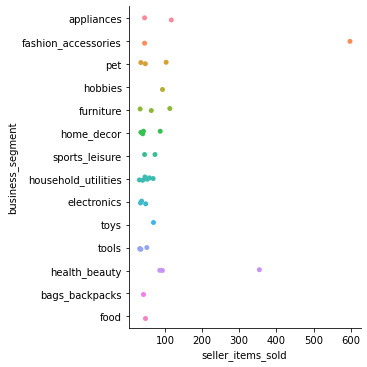

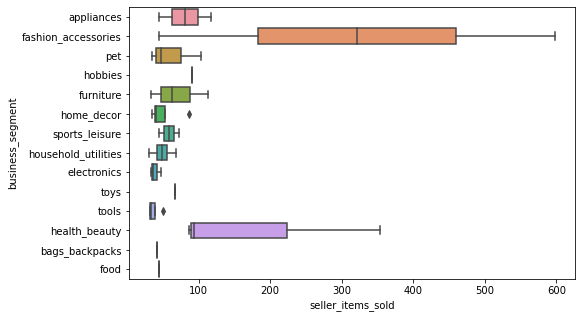

In [55]:
sb.catplot(data = outlierLeads, x="seller_items_sold", y="business_segment")

fig = plt.figure(figsize = (8,5))
sb.boxplot(x = "seller_items_sold", y= "business_segment", data = outlierLeads)

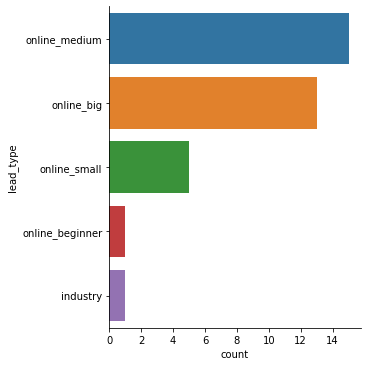

In [112]:
# Lead Type
sb.catplot(data = outlierLeads, y="lead_type", kind="count", order=outlierLeads["lead_type"].value_counts().index)

<AxesSubplot:xlabel='seller_items_sold', ylabel='lead_type'>

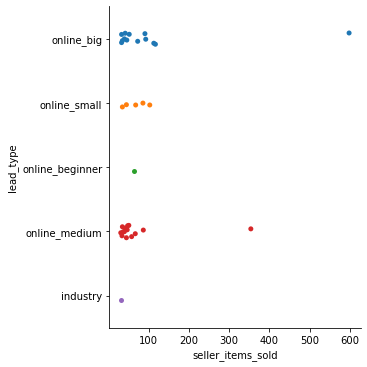

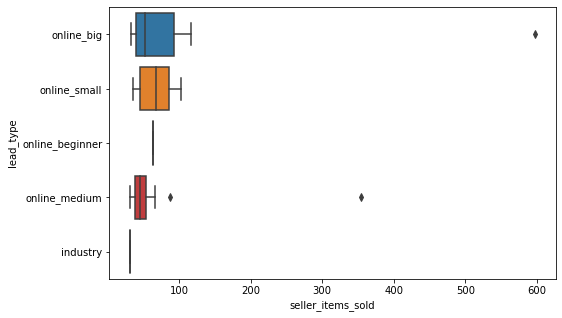

In [56]:
sb.catplot(data = outlierLeads, x="seller_items_sold", y="lead_type")

fig = plt.figure(figsize = (8,5))
sb.boxplot(x = "seller_items_sold", y= "lead_type", data = outlierLeads)

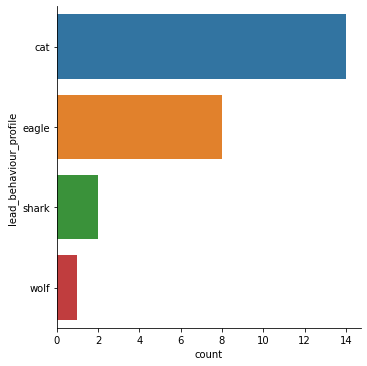

In [113]:
# Lead Behaviour Profile
sb.catplot(data = outlierLeads, y="lead_behaviour_profile", kind="count", order=outlierLeads["lead_behaviour_profile"].value_counts().index)

<AxesSubplot:xlabel='seller_items_sold', ylabel='lead_behaviour_profile'>

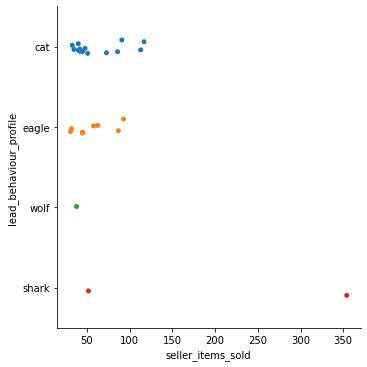

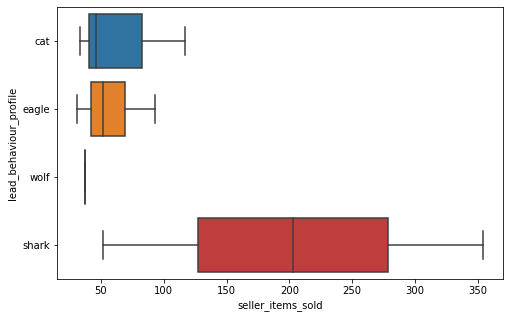

In [57]:
sb.catplot(data = outlierLeads, x="seller_items_sold", y="lead_behaviour_profile")

fig = plt.figure(figsize = (8,5))
sb.boxplot(x = "seller_items_sold", y= "lead_behaviour_profile", data = outlierLeads)

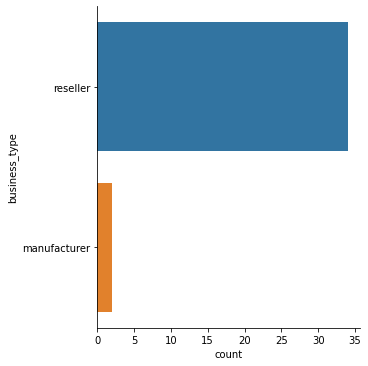

In [114]:
# Business Type
sb.catplot(data = outlierLeads, y="business_type", kind="count", order=outlierLeads["business_type"].value_counts().index)

<AxesSubplot:xlabel='seller_items_sold', ylabel='business_type'>

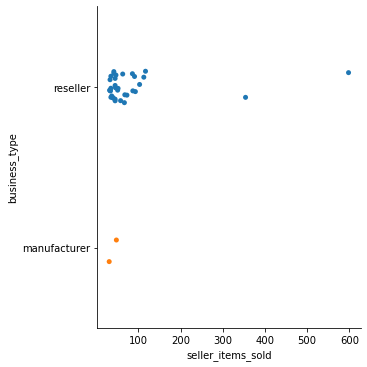

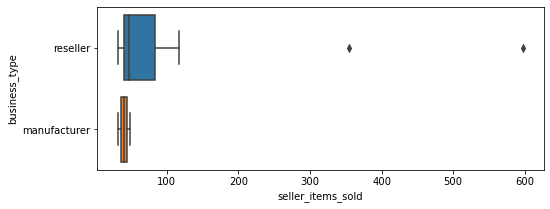

In [60]:
sb.catplot(data = outlierLeads, x="seller_items_sold", y="business_type")

fig = plt.figure(figsize = (8,3))
sb.boxplot(x = "seller_items_sold", y= "business_type", data = outlierLeads)

In [115]:
# Numeric data summary statistics
outlierLeads.describe()

,days_to_first_sale,deal_days,seller_items_sold
count,36.000000,36.000000,36.000000
mean,22.722222,13.527778,79.555556
std,18.201430,14.938897,104.599220
min,3.000000,0.000000,31.000000
25%,10.750000,2.750000,39.250000
50%,19.000000,9.500000,46.500000
75%,25.250000,20.500000,76.250000
max,72.000000,63.000000,598.000000


<AxesSubplot:>

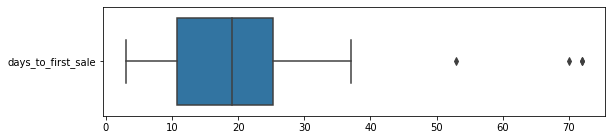

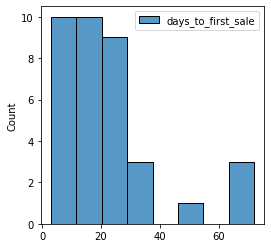

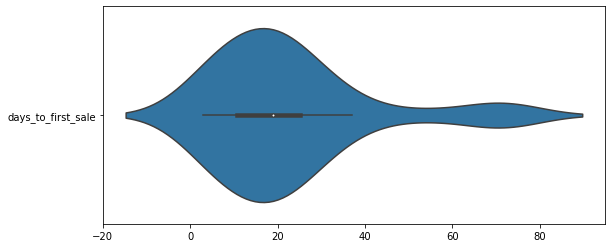

In [116]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierLeads[["days_to_first_sale"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierLeads[["days_to_first_sale"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierLeads[["days_to_first_sale"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

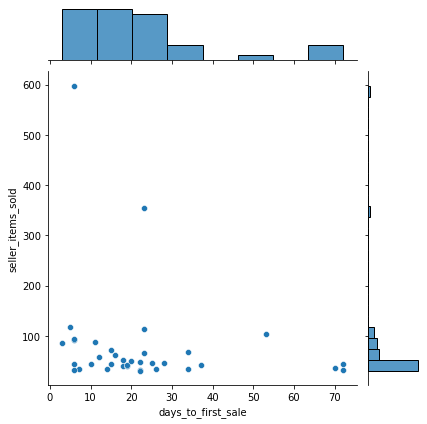

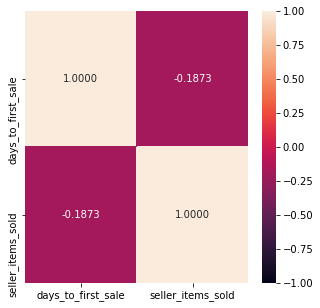

In [62]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierLeads, x="days_to_first_sale", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierLeads[["days_to_first_sale", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

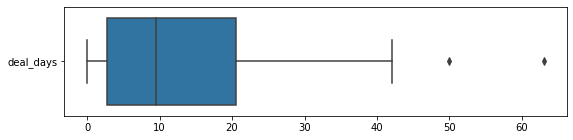

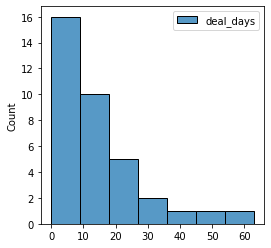

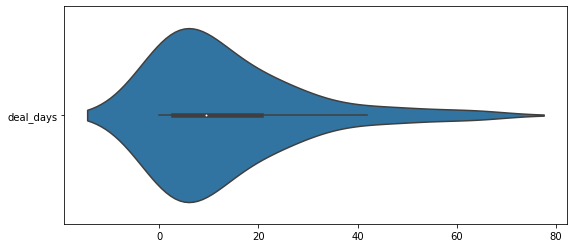

In [121]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierLeads[["deal_days"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierLeads[["deal_days"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierLeads[["deal_days"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

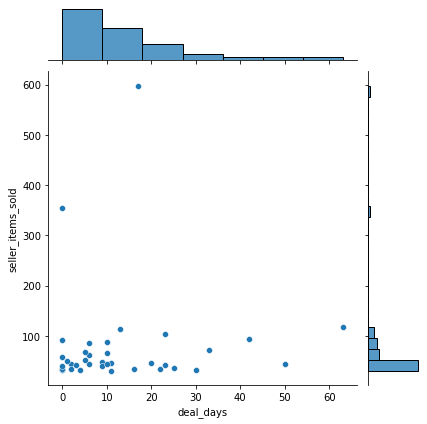

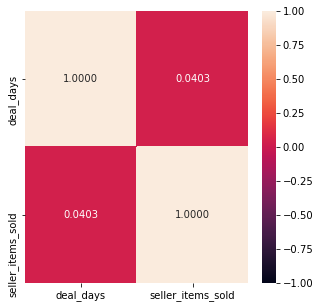

In [63]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierLeads, x="deal_days", y="seller_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierLeads[["deal_days", "seller_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

## Outliers for Response 2: product_items_sold
### extracting outliers & productData insights

In [64]:
productData["product_items_sold"].describe()

count    32951.000000
mean         3.590726
std         11.076677
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max        536.000000
Name: product_items_sold, dtype: float64

<AxesSubplot:xlabel='product_items_sold'>

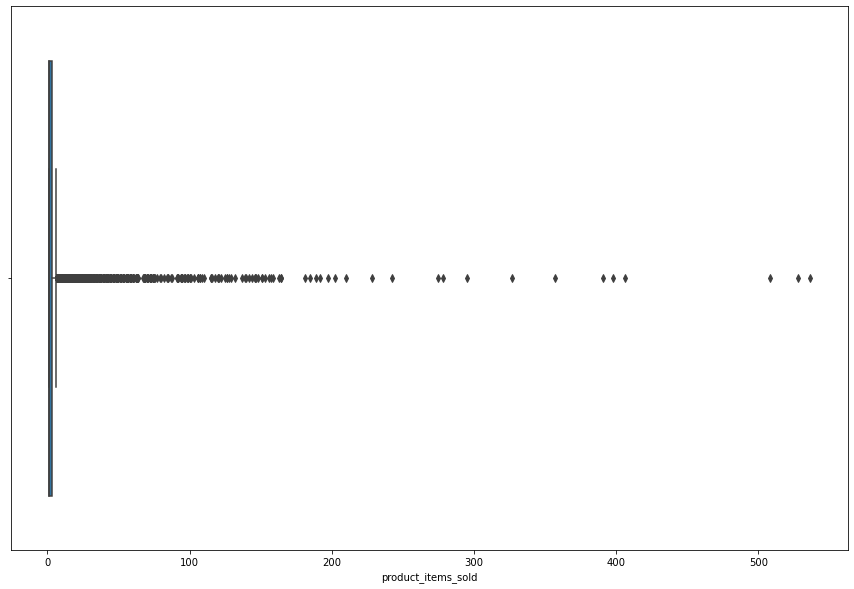

In [65]:
fig = plt.figure(figsize = (15,10))
sb.boxplot(x = "product_items_sold", data = productData)

<AxesSubplot:xlabel='product_items_sold'>

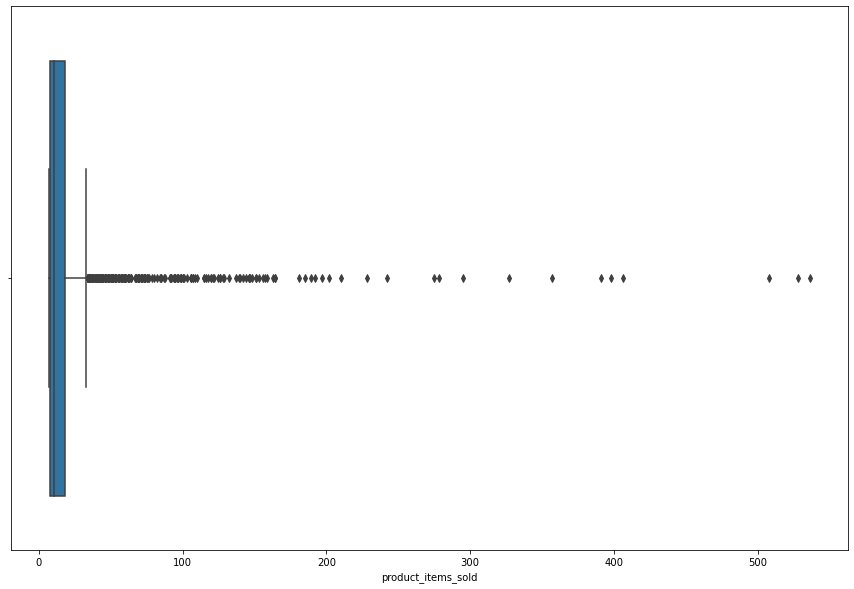

In [66]:
# 1st filter of outliers on the right side
IQR = productData["product_items_sold"].quantile(.75) - productData["product_items_sold"].quantile(.25)
h = productData["product_items_sold"].quantile(.75) + 1.5 * IQR

outlierProducts = productData[productData["product_items_sold"] > h]

fig = plt.figure(figsize = (15,10))
sb.boxplot(x = "product_items_sold", data = outlierProducts)

In [67]:
# 2nd filter of outliers on the right side
IQR = outlierProducts["product_items_sold"].quantile(.75) - outlierProducts["product_items_sold"].quantile(.25)
h = outlierProducts["product_items_sold"].quantile(.75) + 1.5 * IQR

outlierProducts = outlierProducts[outlierProducts["product_items_sold"] > h]
outlierProducts

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_density,product_items_sold,product_rating,product_polarity
46,5f504b3a1c75b73d6151be81eb05bdc9,cool_stuff,38.0,1176.0,3.0,15350.0,47.0,40.0,47.0,88360.0,0.173721,63,4.555556,0.147633
212,bbaef2eadf31fe3ea6702077398be06c,perfumery,45.0,1003.0,2.0,400.0,18.0,11.0,11.0,2178.0,0.183655,71,3.770492,0.056295
289,c6336fa91fbd87c359e44f5dca5a90ed,sports_leisure,39.0,772.0,1.0,150.0,16.0,16.0,11.0,2816.0,0.053267,94,4.182927,0.231396
560,593236d0ff46b4299b4787fb8d43f7f0,industry_commerce_and_business,44.0,1396.0,2.0,7225.0,16.0,103.0,25.0,41200.0,0.175364,37,4.074074,0.125851
578,386486367c1f9d4f587a8864ccb6902b,bed_bath_table,54.0,120.0,1.0,835.0,40.0,9.0,33.0,11880.0,0.070286,60,3.313725,0.018824
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32300,dd6a505f83dd3c6326aa9856519e0978,toys,43.0,623.0,5.0,200.0,16.0,7.0,11.0,1232.0,0.162338,37,4.694444,0.124563
32354,f35927953ed82e19d06ad3aac2f06353,books_general_interest,39.0,724.0,1.0,450.0,20.0,20.0,20.0,8000.0,0.056250,59,4.109091,0.104121
32369,dd0dcee76f9c12fff4bc0eb641d57c7f,electronics,44.0,431.0,1.0,250.0,25.0,7.0,14.0,2450.0,0.102041,43,4.105263,0.022462
32824,fb7a100ec8c7b34f60cec22b1a9a10e0,toys,58.0,321.0,2.0,150.0,16.0,16.0,16.0,4096.0,0.036621,36,4.428571,0.094153


In [68]:
# Standard statistics summary
outlierProducts.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_density,product_items_sold,product_rating,product_polarity
count,344.000000,344.000000,344.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000,346.000000
mean,48.409884,791.122093,2.168605,2267.468208,29.523121,17.317919,22.947977,15680.341040,0.185884,76.531792,4.080174,0.119516
std,9.743534,646.319043,1.704240,3782.642025,15.399258,15.206504,11.249098,22159.003087,0.323190,70.515209,0.389016,0.059237
min,18.000000,58.000000,1.000000,50.000000,11.000000,2.000000,11.000000,352.000000,0.011489,34.000000,2.023256,-0.064234
25%,42.000000,359.000000,1.000000,250.000000,18.000000,9.000000,15.000000,2816.000000,0.066741,41.000000,3.905134,0.083287
50%,51.000000,615.000000,1.000000,650.000000,22.000000,13.000000,20.000000,5662.500000,0.109606,52.000000,4.130435,0.121830
75%,57.000000,985.250000,3.000000,1937.500000,40.000000,20.000000,30.000000,19764.000000,0.185185,81.500000,4.333333,0.155168
max,61.000000,3847.000000,10.000000,22350.000000,101.000000,105.000000,67.000000,134292.000000,4.447586,536.000000,5.000000,0.318740


<AxesSubplot:>

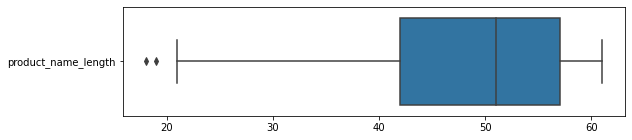

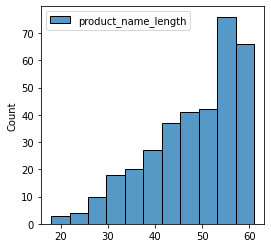

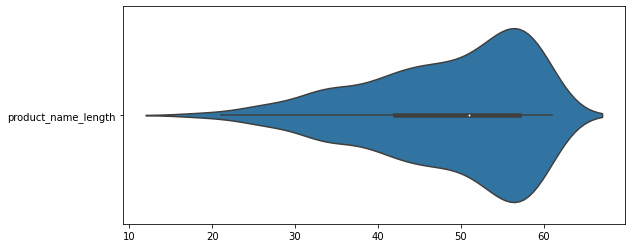

In [69]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_name_length"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_name_length"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_name_length"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

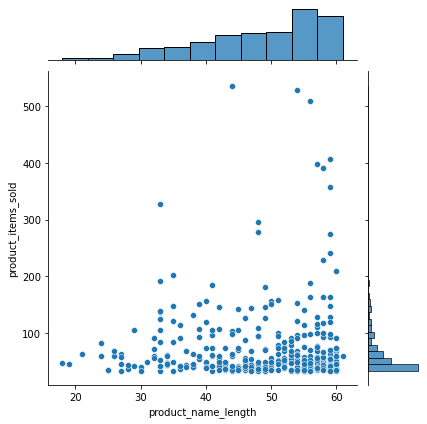

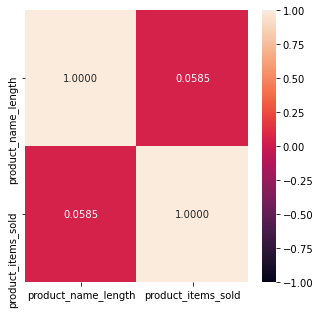

In [73]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_name_length", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_name_length", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

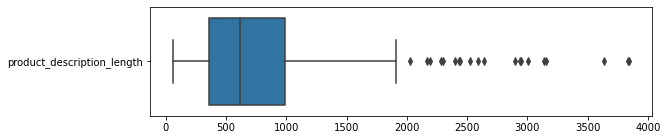

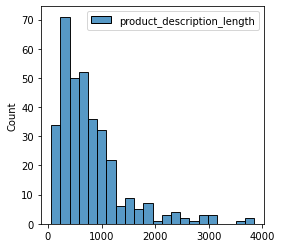

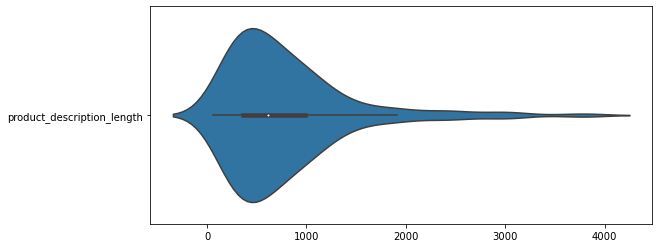

In [136]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_description_length"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_description_length"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_description_length"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

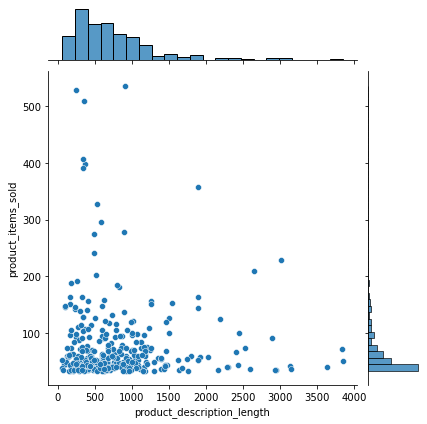

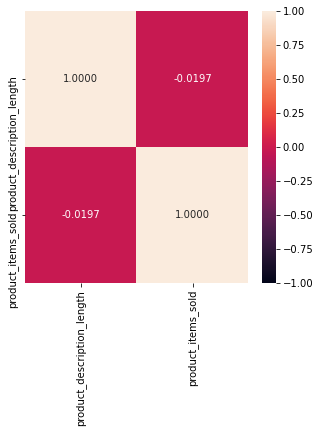

In [74]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_description_length", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_description_length", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

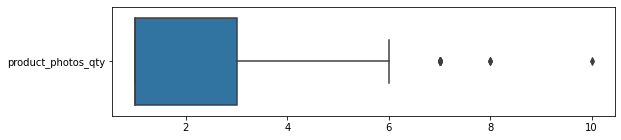

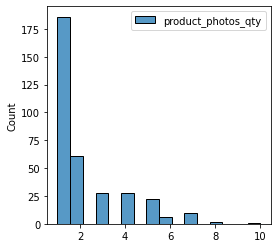

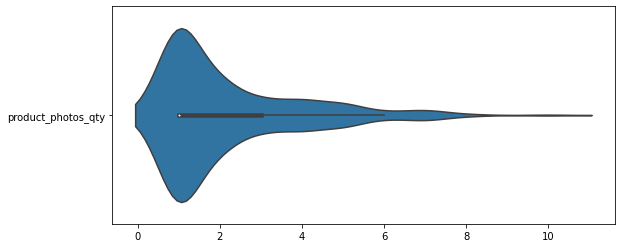

In [137]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_photos_qty"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_photos_qty"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_photos_qty"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

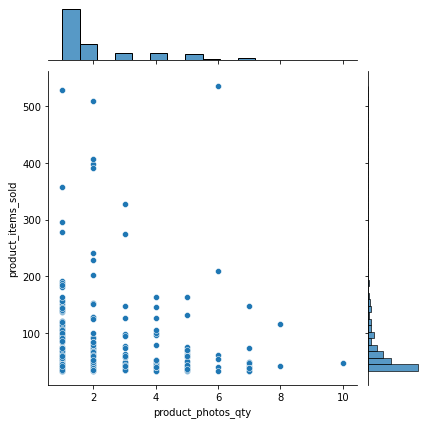

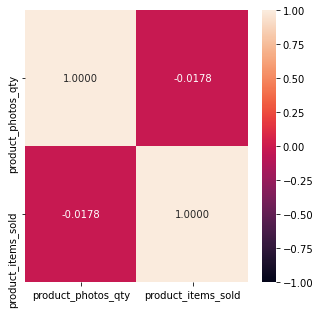

In [75]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_photos_qty", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_photos_qty", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

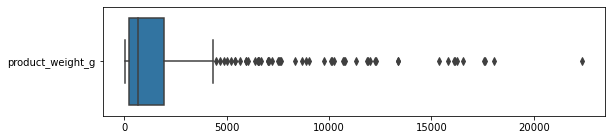

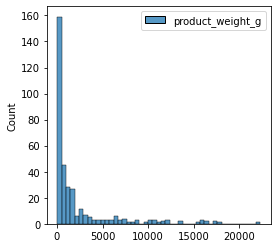

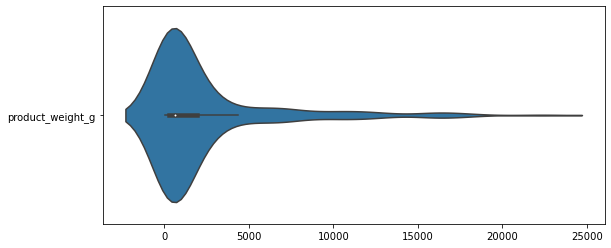

In [138]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_weight_g"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_weight_g"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_weight_g"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

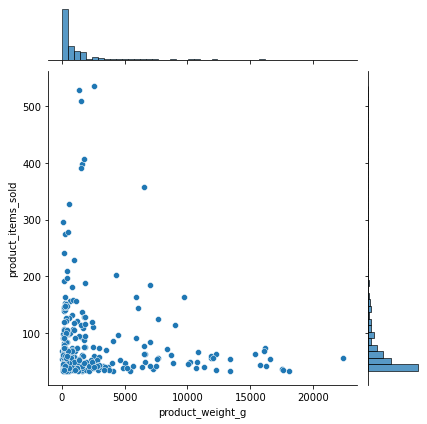

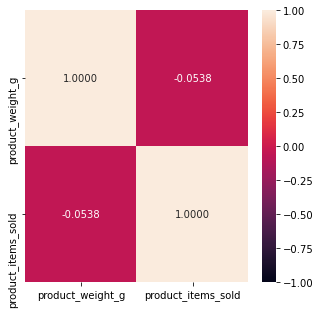

In [76]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_weight_g", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_weight_g", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

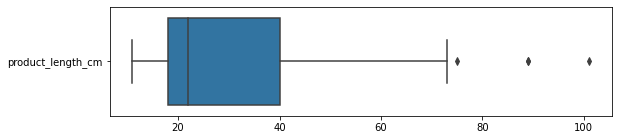

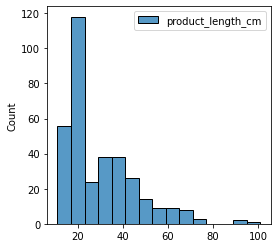

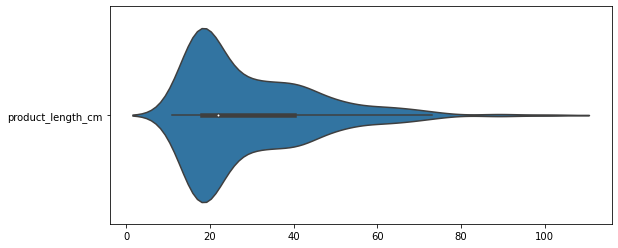

In [139]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_length_cm"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_length_cm"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_length_cm"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

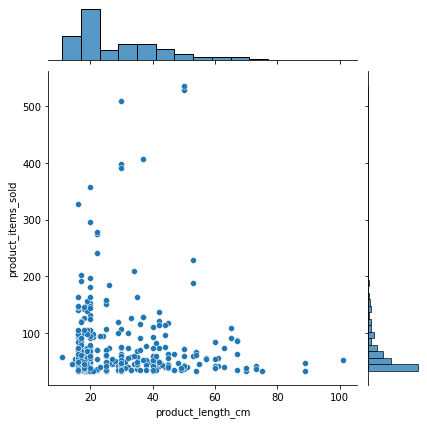

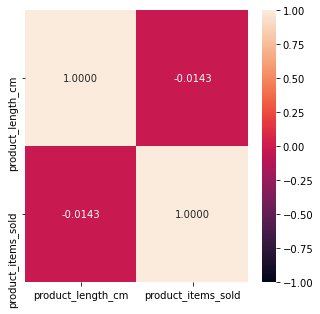

In [77]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_length_cm", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_length_cm", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

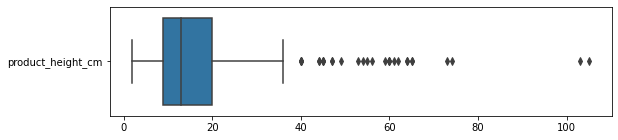

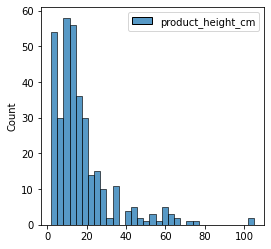

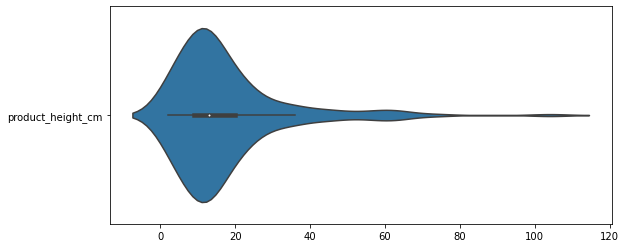

In [140]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_height_cm"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_height_cm"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_height_cm"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

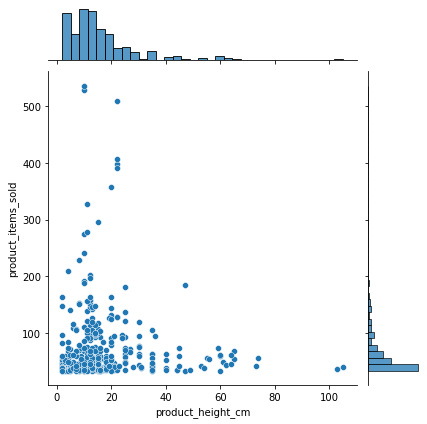

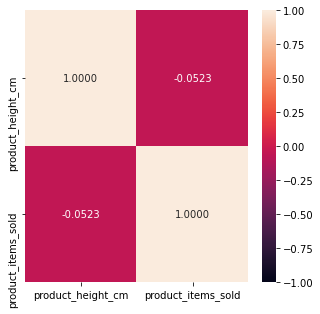

In [78]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_height_cm", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_height_cm", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

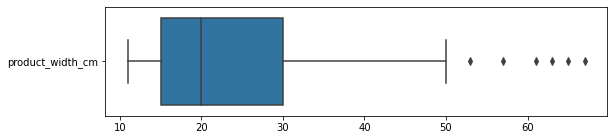

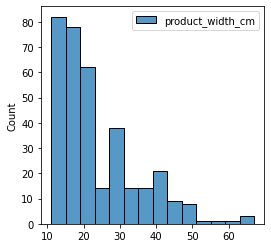

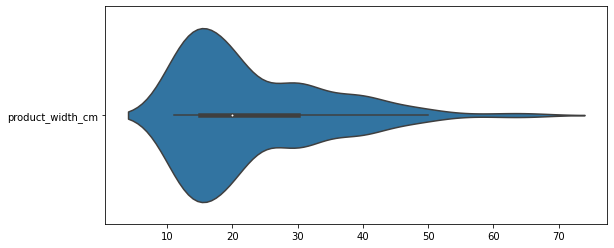

In [141]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_width_cm"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_width_cm"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_width_cm"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

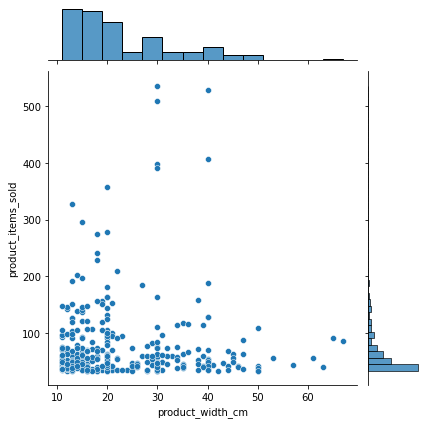

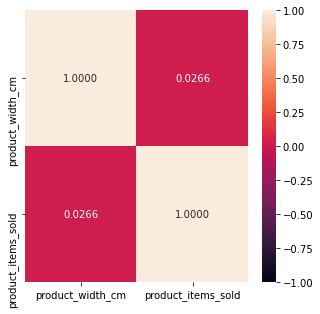

In [79]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_width_cm", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_width_cm", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

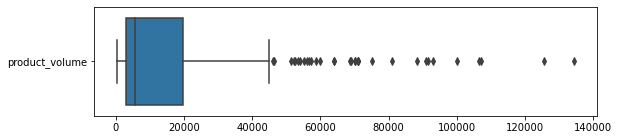

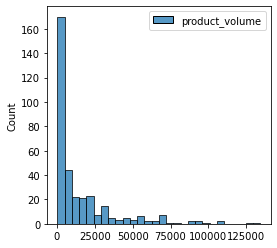

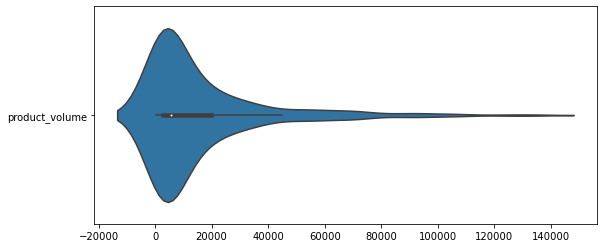

In [142]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_volume"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_volume"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_volume"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

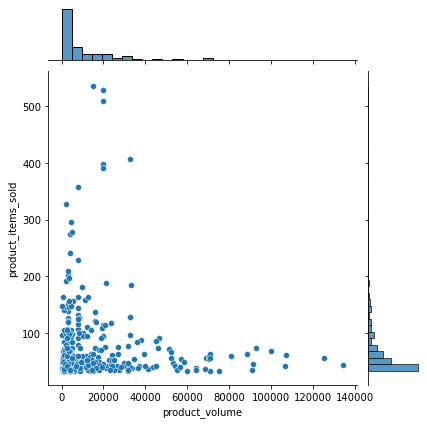

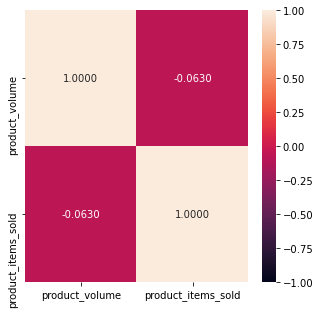

In [80]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_volume", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_volume", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

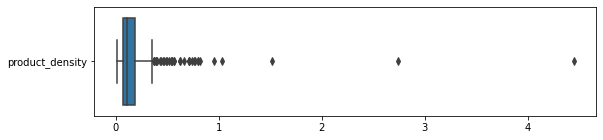

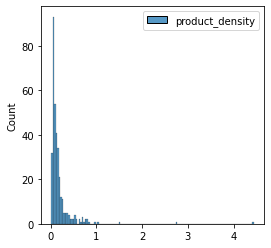

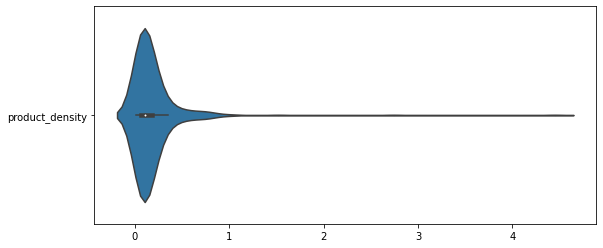

In [143]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_density"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_density"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_density"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

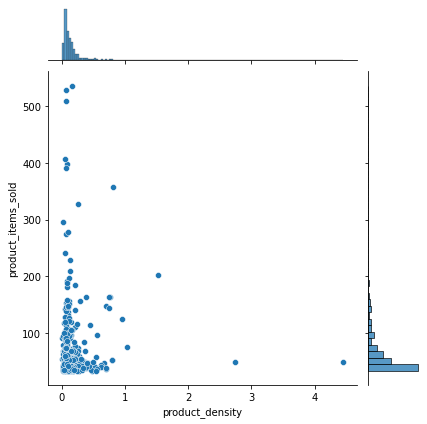

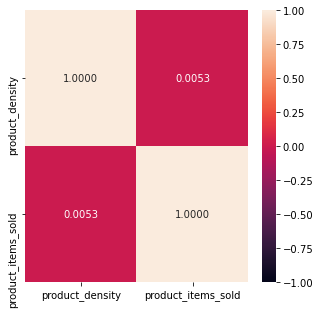

In [81]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_density", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_density", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

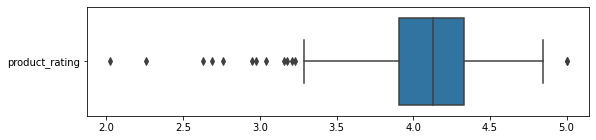

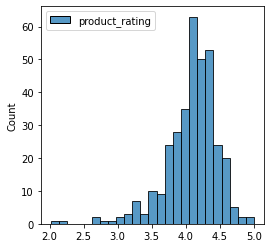

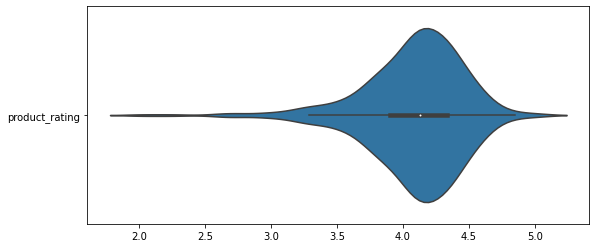

In [145]:
# response 3
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_rating"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_rating"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_rating"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

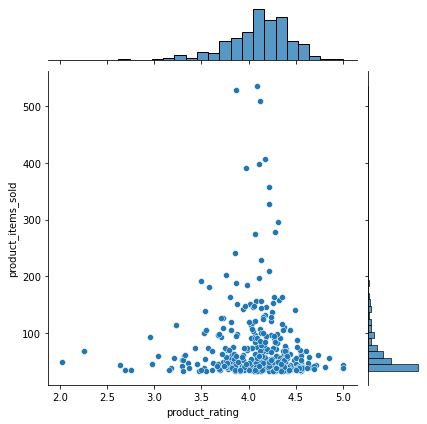

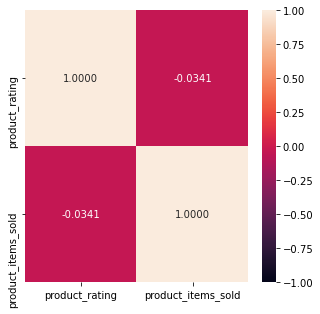

In [82]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_rating", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_rating", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

<AxesSubplot:>

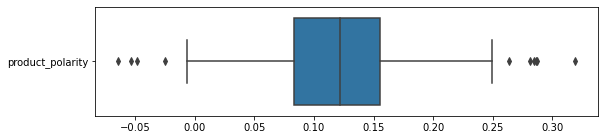

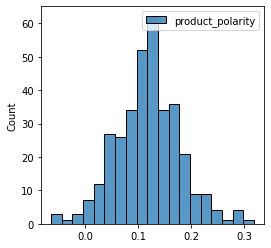

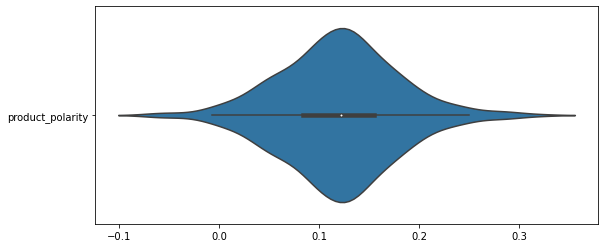

In [146]:
# response 4
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_polarity"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_polarity"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_polarity"]], orient = 'h')

<AxesSubplot:>

<Figure size 576x576 with 0 Axes>

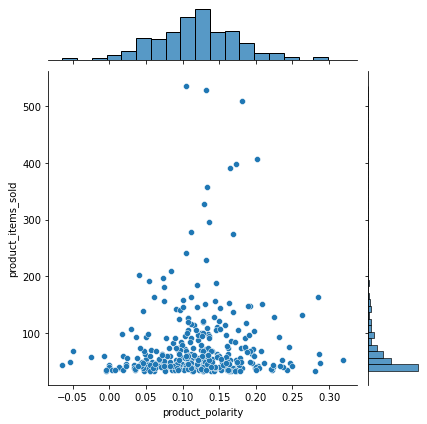

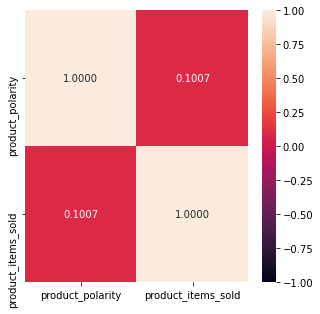

In [83]:
fig = plt.figure(figsize = (8,8))
sb.jointplot(data = outlierProducts, x="product_polarity", y="product_items_sold")

fig = plt.figure(figsize = (5,5))
sb.heatmap(outlierProducts[["product_polarity", "product_items_sold"]].corr(), vmin = -1, vmax = 1, annot = True, fmt=".4f")

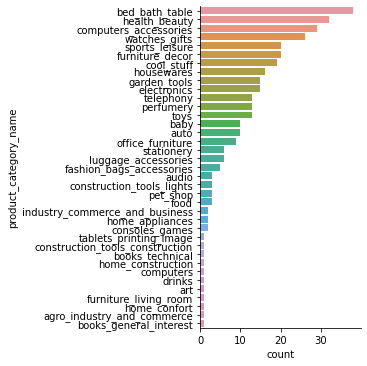

In [147]:
# Product Category Name
sb.catplot(data = outlierProducts, y="product_category_name", kind="count", order=outlierProducts["product_category_name"].value_counts().index)

<AxesSubplot:xlabel='product_items_sold', ylabel='product_category_name'>

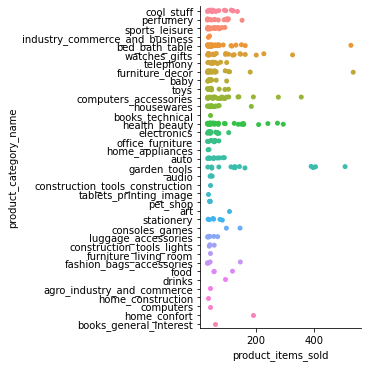

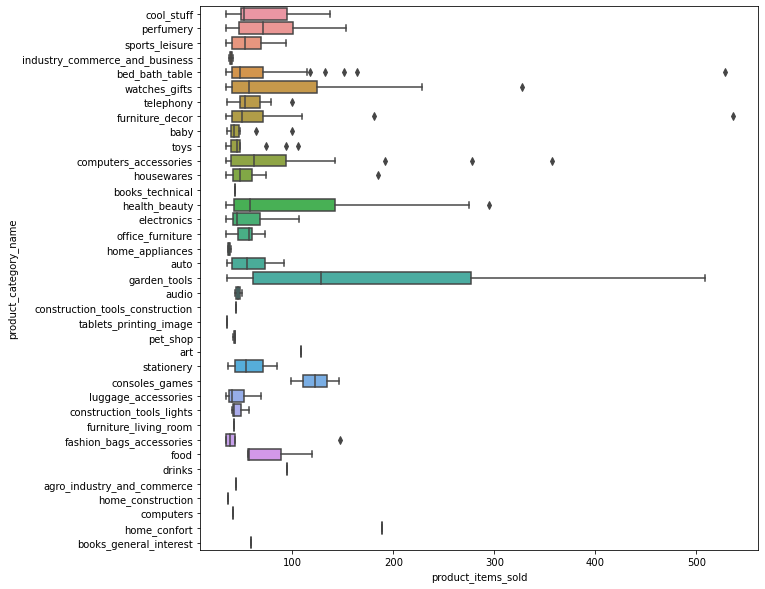

In [85]:
sb.catplot(data = outlierProducts, x="product_items_sold", y="product_category_name")

fig = plt.figure(figsize = (10,10))
sb.boxplot(x = "product_items_sold", y= "product_category_name", data = outlierProducts)

## Outliers for Response 3: product_rating
### extracting outliers & productData insights

In [205]:
productData["product_rating"].describe()

count    32951.000000
mean         4.038113
std          1.218262
min          1.000000
25%          3.571429
50%          4.500000
75%          5.000000
max          5.000000
Name: product_rating, dtype: float64

<AxesSubplot:xlabel='product_rating'>

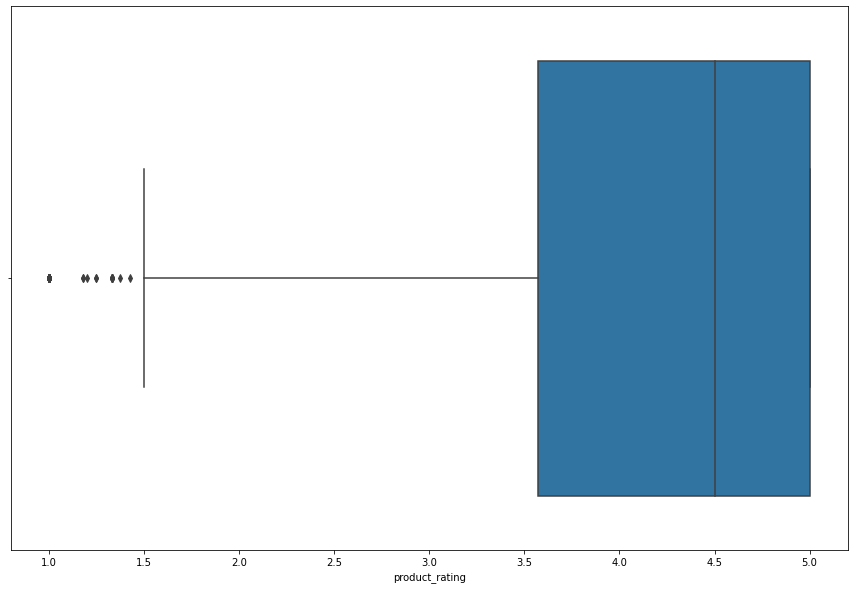

In [206]:
fig = plt.figure(figsize = (15,10))
sb.boxplot(x = "product_rating", data = productData)

In [207]:
# since there are no good outliers, we'll take well-performing product as those with average rating of 5.0
outlierProducts = productData[productData["product_rating"] == 5]
outlierProducts

# there are so many of them :o
# a lot of customers give ratings of 5.0
# and especially when the product is only bought 1 or 2 times, the chances of it having an average of 5.0 is much higher
# so this is not a good measure of sales performance...

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_density,product_items_sold,product_rating,product_polarity
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0,2240.0,0.100446,1,5.0,-0.040741
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,0.092593,1,5.0,1.000000
2,96bd76ec8810374ed1b65e291975717f,sports_leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0,2430.0,0.063374,1,5.0,0.000000
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0,4420.0,0.141403,1,5.0,0.000000
5,41d3672d4792049fa1779bb35283ed13,musical_instruments,60.0,745.0,1.0,200.0,38.0,5.0,11.0,2090.0,0.095694,1,5.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32933,6f79d50d852c044e3f7f0954d13aeacf,furniture_decor,53.0,194.0,11.0,1100.0,31.0,11.0,26.0,8866.0,0.124069,1,5.0,0.000000
32936,4e1d2ef2974c85d82582edfe594a4f57,sports_leisure,43.0,191.0,4.0,300.0,25.0,10.0,20.0,5000.0,0.060000,1,5.0,0.000000
32939,4508e088c4a07e0ad64f6fa3751e314a,sports_leisure,45.0,1931.0,1.0,330.0,24.0,20.0,16.0,7680.0,0.042969,1,5.0,0.000000
32944,1a14237ecc2fe3772b55c8d4e11ccb35,furniture_decor,58.0,1405.0,3.0,150.0,35.0,2.0,25.0,1750.0,0.085714,1,5.0,0.000000


<AxesSubplot:>

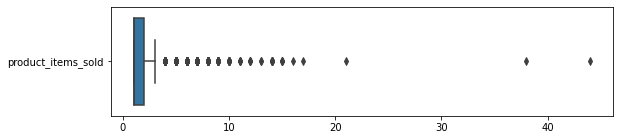

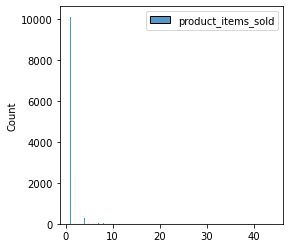

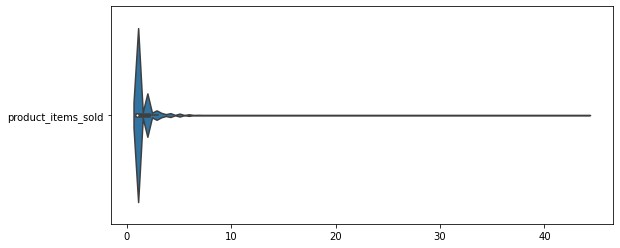

In [208]:
# proof !
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_items_sold"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_items_sold"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_items_sold"]], orient = 'h')

## Outliers for Response 4: product_polarity
### extracting outliers & productData insights

In [209]:
productData["product_polarity"].describe()

count    32951.000000
mean         0.116749
std          0.251282
min         -1.000000
25%          0.000000
50%          0.000000
75%          0.175000
max          1.000000
Name: product_polarity, dtype: float64

<AxesSubplot:xlabel='product_polarity'>

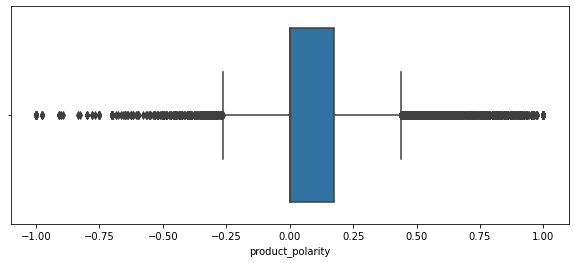

In [210]:
fig = plt.figure(figsize = (10,4))
sb.boxplot(x = "product_polarity", data = productData)

<AxesSubplot:xlabel='product_polarity'>

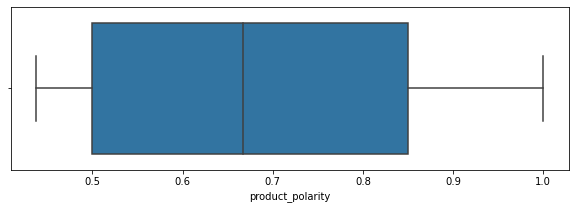

In [211]:
# 1st filter of outliers on the right side
IQR = productData["product_polarity"].quantile(.75) - productData["product_polarity"].quantile(.25)
h = productData["product_polarity"].quantile(.75) + 1.5 * IQR

outlierProducts = productData[productData["product_polarity"] > h]

fig = plt.figure(figsize = (10,3))
sb.boxplot(x = "product_polarity", data = outlierProducts)

In [212]:
# still a lot of products, filter them to be higher than current upper quartile
m = outlierProducts["product_polarity"].quantile(.75)
outlierProducts = outlierProducts[outlierProducts["product_polarity"] > m]

outlierProducts

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_density,product_items_sold,product_rating,product_polarity
1,3aa071139cb16b67ca9e5dea641aaa2f,art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,10800.0,0.092593,1,5.0,1.000
110,e8e86cbab028363545a5bf0ca5e226ee,furniture_living_room,36.0,312.0,2.0,6050.0,55.0,10.0,46.0,25300.0,0.239130,1,5.0,0.900
134,51fed4afb1b41d00ad9d25a73b7fbbc7,consoles_games,48.0,303.0,3.0,250.0,21.0,7.0,15.0,2205.0,0.113379,1,5.0,0.910
165,15b3d40f375c0645c1eed4ed1cd8e17a,fashion_bags_accessories,30.0,401.0,3.0,150.0,16.0,11.0,11.0,1936.0,0.077479,1,5.0,1.000
311,4da06dee0a480b5d666886ea00b4d9b3,bed_bath_table,54.0,228.0,1.0,250.0,32.0,3.0,23.0,2208.0,0.113225,1,5.0,1.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32863,0a27ed1c4807a2257f67ab0cbf3cfaf4,housewares,58.0,941.0,3.0,125.0,28.0,9.0,18.0,4536.0,0.027557,1,4.0,1.000
32884,2245f9825a544daf9adb59c50d0eae03,sports_leisure,50.0,224.0,1.0,250.0,30.0,30.0,30.0,27000.0,0.009259,1,4.0,0.910
32886,1dff983bf86722fbc11a0c1d0ec13624,small_appliances_home_oven_and_coffee,60.0,1179.0,1.0,400.0,28.0,11.0,11.0,3388.0,0.118064,1,5.0,0.855
32898,80b391b2dc6c958ef3ad34fa7ee01423,auto,17.0,306.0,4.0,200.0,26.0,4.0,13.0,1352.0,0.147929,1,4.0,0.910


<AxesSubplot:>

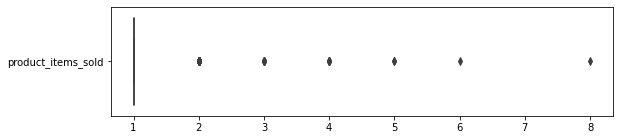

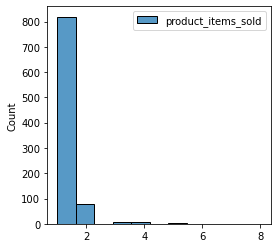

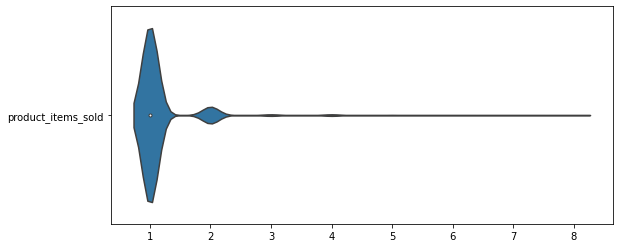

In [213]:
# even less items sold per product using this sales performance measure
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_items_sold"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_items_sold"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_items_sold"]], orient = 'h')

## Combining all 3 responses on product side
in the following order:
* product_items_sold
* product_rating
* product_polarity

#### Why use all  3 responses together?
Because the last 2 responses are not well represented as a performance measure on their own.
Due to low number of buyers, the average rating and polarity would be very high if the few that bought the product gave high ratings & good reviews.

SO we use a combination to find products that did well in all 3 measures.

#### Justification for the order of response:
It is ordered in terms of importance of response.
* product_items_sold is the most important because it reaps actual results, which is revenue for the seller
* product_rating is the next most important because more customers give ratings than comments (product_polarity is derived from comments) and the rating scores are taken from raw data, which will be more accurate
* product_polarity is given the least importance as it went through a couple of levels of alteration from raw comments
    1. comments were translated from Portugeuse to English
    2. translated comments were passed through a sentiment analysis model and given a score
    > inaccuracies in both translation and the model would cause product_polarity to be less reliable in representing sales performance than product_rating
    
### extracting outliers & productData insights

In [86]:
# 1. get outliers (through double-filter) in terms of high number of product_items_sold
IQR = productData["product_items_sold"].quantile(.75) - productData["product_items_sold"].quantile(.25)
h = productData["product_items_sold"].quantile(.75) + 1.5 * IQR
outlierProducts = productData[productData["product_items_sold"] > h]

# 1.1 one more filter
# uq = outlierProducts["product_items_sold"].quantile(.75)
# outlierProducts = outlierProducts[outlierProducts["product_items_sold"] > uq]

IQR = outlierProducts["product_items_sold"].quantile(.75) - outlierProducts["product_items_sold"].quantile(.25)
h = outlierProducts["product_items_sold"].quantile(.75) + 1.5 * IQR
outlierProducts = outlierProducts[outlierProducts["product_items_sold"] > h]

outlierProducts[["product_items_sold", "product_rating", "product_polarity"]].describe()

,product_items_sold,product_rating,product_polarity
count,346.000000,346.000000,346.000000
mean,76.531792,4.080174,0.119516
std,70.515209,0.389016,0.059237
min,34.000000,2.023256,-0.064234
25%,41.000000,3.905134,0.083287
50%,52.000000,4.130435,0.121830
75%,81.500000,4.333333,0.155168
max,536.000000,5.000000,0.318740


<AxesSubplot:>

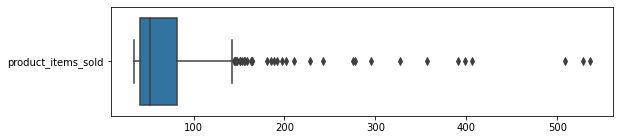

In [87]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_items_sold"]], orient = 'h')

<AxesSubplot:>

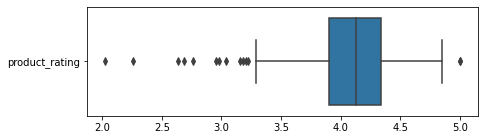

In [88]:
fig = plt.figure(figsize = (7,2))
sb.boxplot(data=outlierProducts[["product_rating"]], orient = 'h')

In [89]:
# 2. filter in terms of product_rating

m = outlierProducts["product_rating"].quantile(.5)
outlierProducts = outlierProducts[outlierProducts["product_rating"] > m]
outlierProducts[["product_items_sold", "product_rating", "product_polarity"]].describe()

,product_items_sold,product_rating,product_polarity
count,172.000000,172.000000,172.000000
mean,69.540698,4.356391,0.136258
std,56.640382,0.166451,0.055086
min,34.000000,4.131783,0.000000
25%,40.000000,4.230769,0.100709
50%,50.000000,4.336667,0.134054
75%,72.000000,4.440294,0.167100
max,406.000000,5.000000,0.318740


<AxesSubplot:>

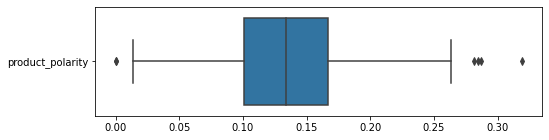

In [90]:
fig = plt.figure(figsize = (8,2))
sb.boxplot(data=outlierProducts[["product_polarity"]], orient = 'h')

In [91]:
# 3. filter in terms of product_polarity
lq = outlierProducts["product_polarity"].quantile(.25)
outlierProducts = outlierProducts[outlierProducts["product_polarity"] > lq]
outlierProducts[["product_items_sold", "product_rating", "product_polarity"]].describe()

,product_items_sold,product_rating,product_polarity
count,129.000000,129.000000,129.000000
mean,73.449612,4.354394,0.157695
std,61.645149,0.149873,0.044428
min,34.000000,4.131783,0.100887
25%,40.000000,4.233333,0.125960
50%,52.000000,4.342105,0.144820
75%,77.000000,4.440000,0.178604
max,406.000000,4.814815,0.318740


Now we can move on to the visualisation and gain insights from these 'well-performing' products!

In [92]:
# Standard statistics summary
outlierProducts.describe()

,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_volume,product_density,product_items_sold,product_rating,product_polarity
count,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000,129.000000
mean,49.139535,834.465116,2.248062,2539.263566,29.193798,17.581395,24.720930,16345.844961,0.172204,73.449612,4.354394,0.157695
std,9.385614,690.966941,1.667853,3973.645187,13.213439,14.631247,11.990867,20789.320745,0.167226,61.645149,0.149873,0.044428
min,18.000000,60.000000,1.000000,50.000000,15.000000,2.000000,11.000000,352.000000,0.012500,34.000000,4.131783,0.100887
25%,45.000000,412.000000,1.000000,300.000000,18.000000,8.000000,15.000000,3080.000000,0.076190,40.000000,4.233333,0.125960
50%,52.000000,646.000000,2.000000,1032.000000,25.000000,14.000000,20.000000,8000.000000,0.122449,52.000000,4.342105,0.144820
75%,57.000000,977.000000,3.000000,2800.000000,37.000000,22.000000,31.000000,23920.000000,0.186090,77.000000,4.440000,0.178604
max,61.000000,3847.000000,8.000000,22350.000000,73.000000,105.000000,65.000000,125504.000000,0.818750,406.000000,4.814815,0.318740


<AxesSubplot:>

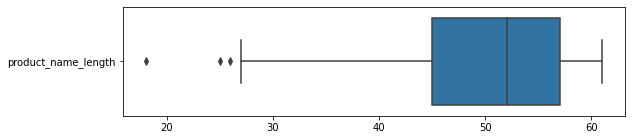

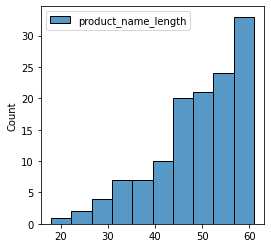

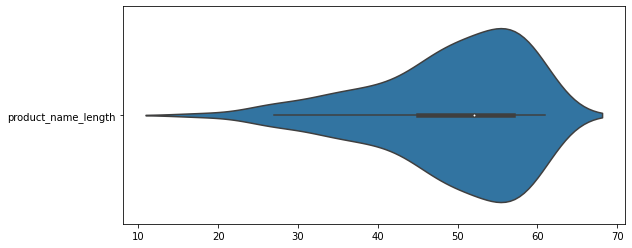

In [93]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_name_length"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_name_length"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_name_length"]], orient = 'h')

<AxesSubplot:>

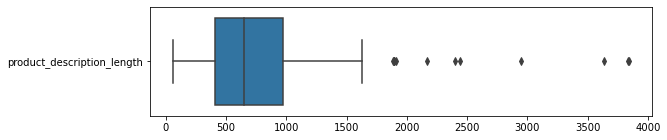

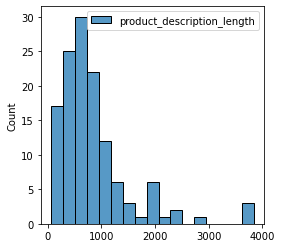

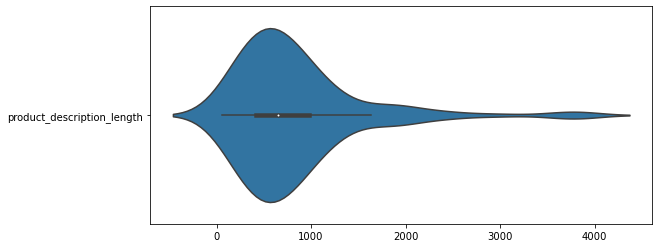

In [263]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_description_length"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_description_length"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_description_length"]], orient = 'h')

<AxesSubplot:>

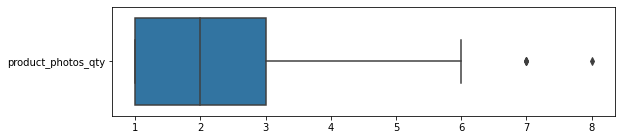

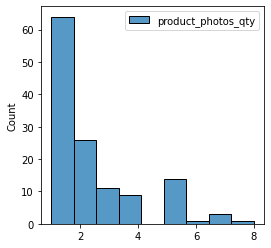

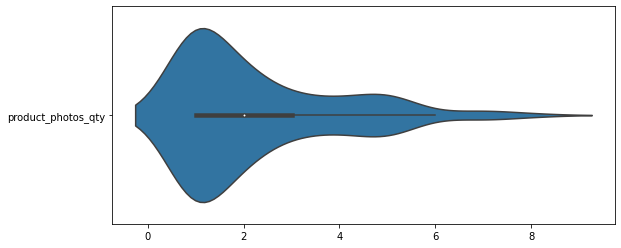

In [264]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_photos_qty"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_photos_qty"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_photos_qty"]], orient = 'h')

<AxesSubplot:>

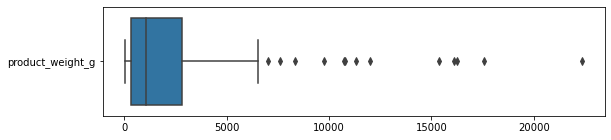

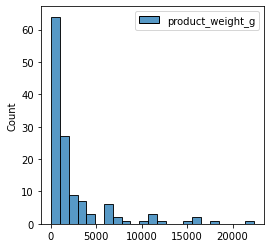

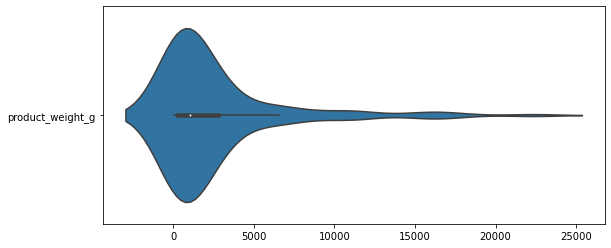

In [265]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_weight_g"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_weight_g"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_weight_g"]], orient = 'h')

<AxesSubplot:>

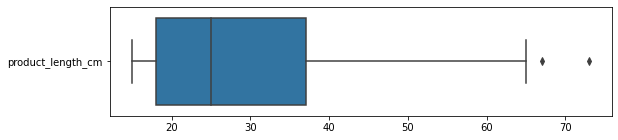

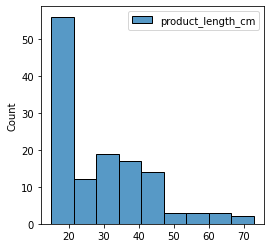

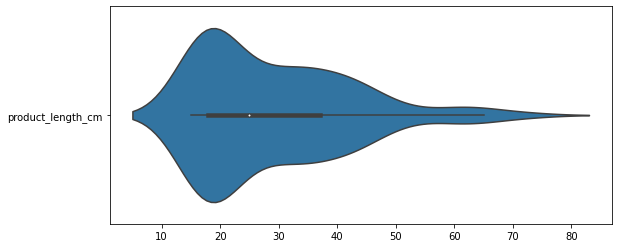

In [266]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_length_cm"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_length_cm"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_length_cm"]], orient = 'h')

<AxesSubplot:>

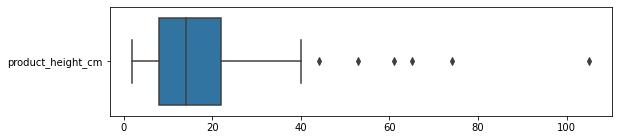

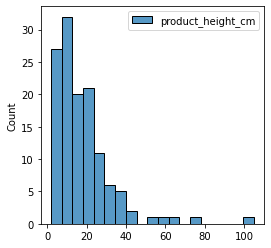

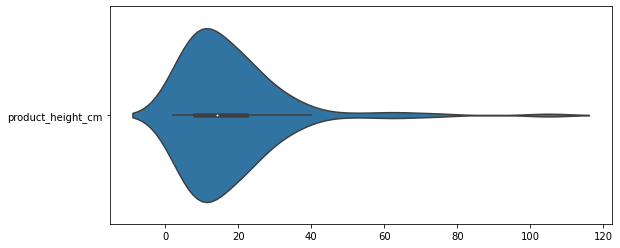

In [267]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_height_cm"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_height_cm"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_height_cm"]], orient = 'h')

<AxesSubplot:>

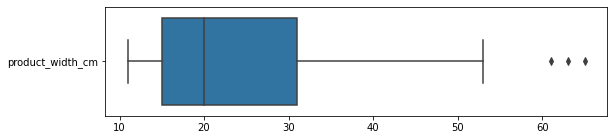

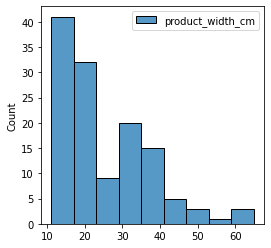

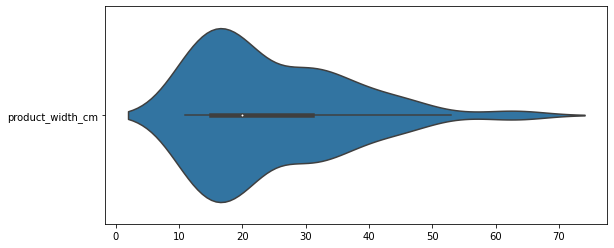

In [268]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_width_cm"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_width_cm"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_width_cm"]], orient = 'h')

<AxesSubplot:>

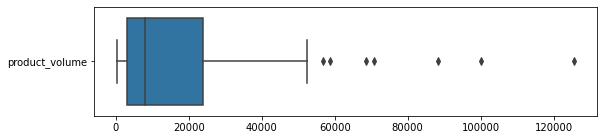

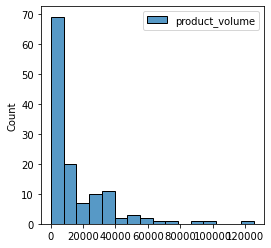

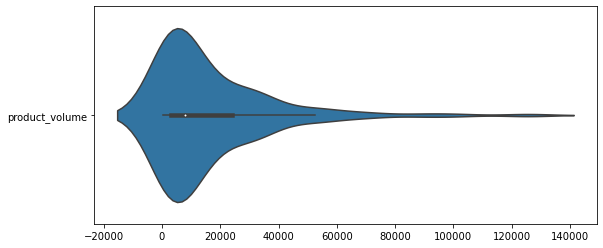

In [269]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_volume"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_volume"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_volume"]], orient = 'h')

<AxesSubplot:>

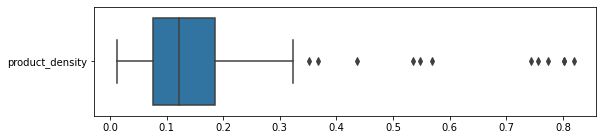

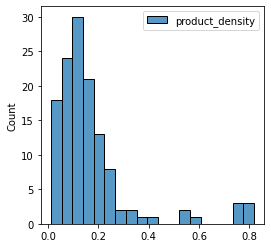

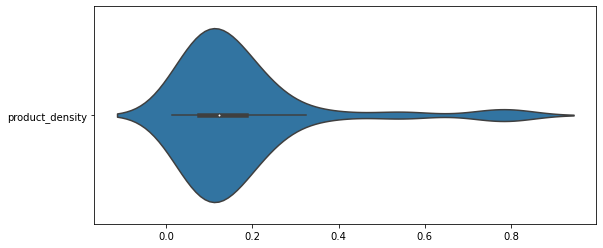

In [270]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierProducts[["product_density"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierProducts[["product_density"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierProducts[["product_density"]], orient = 'h')

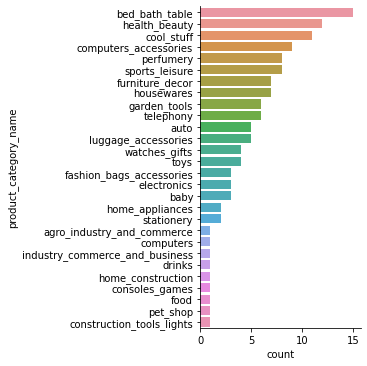

In [298]:
# Product Category Name
sb.catplot(data = outlierProducts, y="product_category_name", kind="count", order=outlierProducts["product_category_name"].value_counts().index)

### orderData insights

In [299]:
# discard the columns we already visualised, it's quite cluttering
outlierProducts.drop(columns=["product_category_name", "product_name_length", "product_description_length",\
                            "product_photos_qty", "product_weight_g", "product_length_cm", "product_height_cm",\
                            "product_width_cm", "product_volume", "product_density"], inplace=True)
outlierProducts.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 46 to 32300
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          129 non-null    object 
 1   product_items_sold  129 non-null    int64  
 2   product_rating      129 non-null    float64
 3   product_polarity    129 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 9.1+ KB


In [300]:
outlierP_order = outlierProducts.merge(orderData, on="product_id")
outlierP_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9475 entries, 0 to 9474
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            9475 non-null   object 
 1   product_items_sold    9475 non-null   int64  
 2   product_rating        9475 non-null   float64
 3   product_polarity      9475 non-null   float64
 4   order_id              9475 non-null   object 
 5   seller_id             9475 non-null   object 
 6   customer_id           9475 non-null   object 
 7   review_id             9475 non-null   object 
 8   order_status          9475 non-null   object 
 9   price                 9475 non-null   float64
 10  payment_type          9475 non-null   object 
 11  payment_installments  9475 non-null   float64
 12  payment_time          9470 non-null   float64
 13  lead_time             9363 non-null   float64
 14  delivery_performance  9363 non-null   float64
 15  review_time          

In [301]:
outlierProducts["product_items_sold"].sum()
# correct number so correctly merged

9475

In [302]:
# summary stats of numeric data
outlierP_order.describe()

,product_items_sold,product_rating,product_polarity,price,payment_installments,payment_time,lead_time,delivery_performance,review_time,review_score,polarity
count,9475.000000,9475.000000,9475.000000,9475.000000,9475.000000,9470.000000,9363.000000,9363.000000,9475.000000,9475.000000,9475.000000
mean,124.786385,4.316359,0.155254,110.154754,2.902269,0.291869,11.686959,11.501869,2.763483,4.278417,0.151031
std,106.836384,0.136556,0.044507,117.803445,2.666802,0.768428,8.040723,8.575766,10.728720,1.183124,0.308992
min,34.000000,4.131783,0.100887,12.470000,1.000000,0.000000,0.000000,-105.000000,0.000000,1.000000,-1.000000
25%,50.000000,4.213622,0.125534,49.900000,1.000000,0.000000,7.000000,7.000000,1.000000,4.000000,0.000000
50%,80.000000,4.281250,0.139820,89.900000,2.000000,0.000000,10.000000,12.000000,1.000000,5.000000,0.000000
75%,146.000000,4.384615,0.176652,134.900000,4.000000,0.000000,15.000000,16.000000,3.000000,5.000000,0.200000
max,406.000000,4.814815,0.318740,1649.990000,24.000000,13.000000,131.000000,57.000000,433.000000,5.000000,1.000000


<AxesSubplot:>

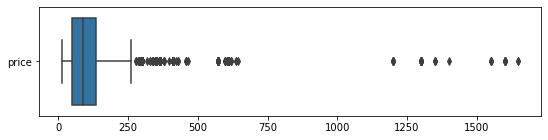

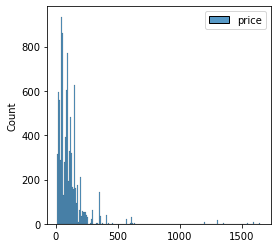

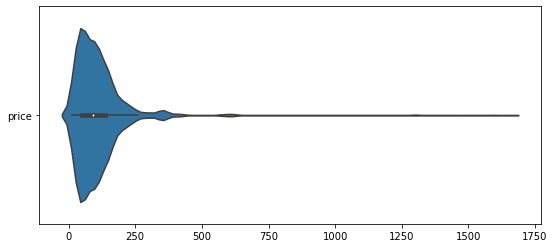

In [283]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierP_order[["price"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierP_order[["price"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierP_order[["price"]], orient = 'h')

<AxesSubplot:>

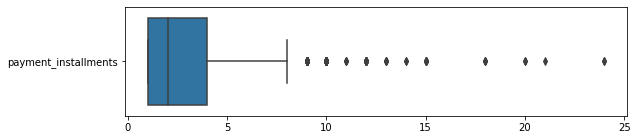

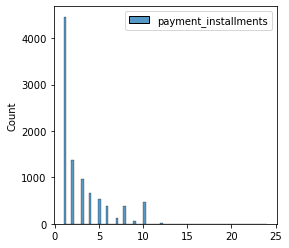

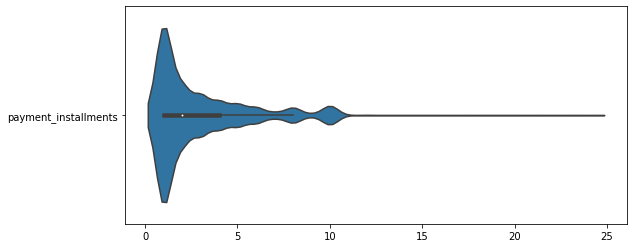

In [284]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierP_order[["payment_installments"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierP_order[["payment_installments"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierP_order[["payment_installments"]], orient = 'h')

<AxesSubplot:>

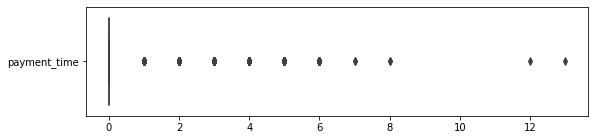

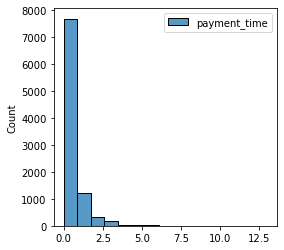

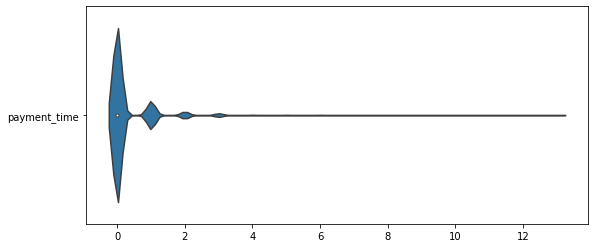

In [285]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierP_order[["payment_time"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierP_order[["payment_time"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierP_order[["payment_time"]], orient = 'h')

<AxesSubplot:>

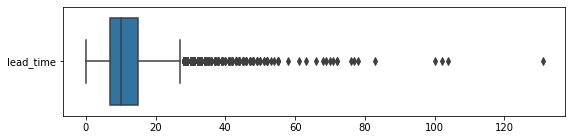

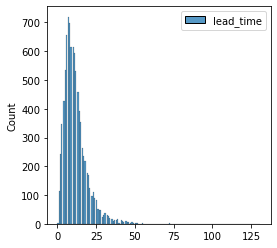

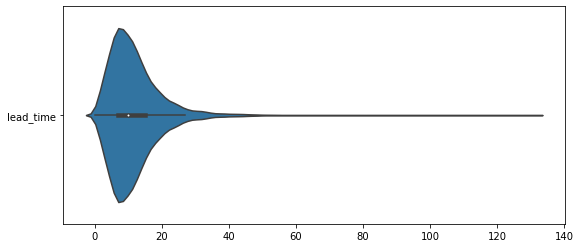

In [287]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierP_order[["lead_time"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierP_order[["lead_time"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierP_order[["lead_time"]], orient = 'h')

<AxesSubplot:>

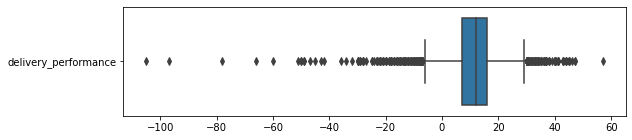

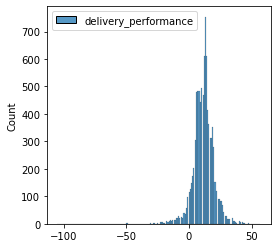

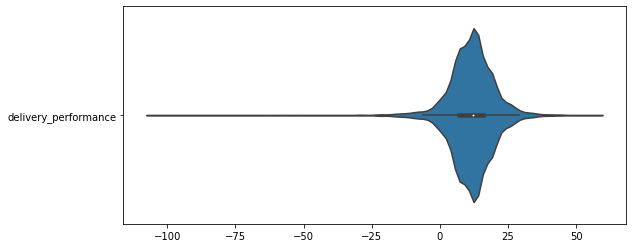

In [288]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierP_order[["delivery_performance"]], orient = 'h')

fig = plt.figure(figsize = (4,4))
sb.histplot(data=outlierP_order[["delivery_performance"]])

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierP_order[["delivery_performance"]], orient = 'h')

<AxesSubplot:>

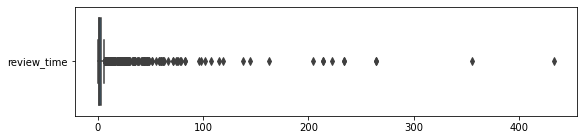

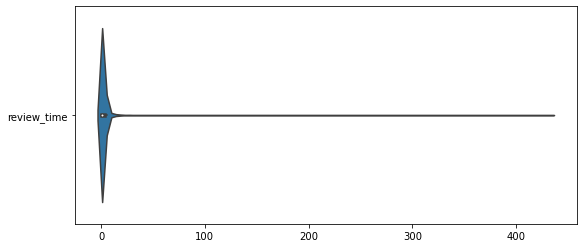

In [289]:
fig = plt.figure(figsize = (9,2))
sb.boxplot(data=outlierP_order[["review_time"]], orient = 'h')

fig = plt.figure(figsize = (9,4))
sb.violinplot(data=outlierP_order[["review_time"]], orient = 'h')

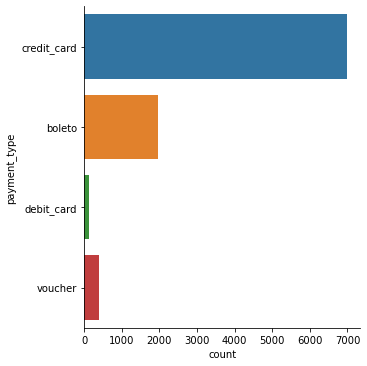

In [297]:
sb.catplot(data = outlierP_order, y="payment_type", kind="count")

### customerData insights

In [303]:
# discard the columns we already visualised thus don't need anymore
outlierP_order.drop(columns=["order_id", "review_id", "order_status", "price", "payment_type",\
                              "payment_installments", "payment_time", "lead_time", "delivery_performance",\
                              "review_time", "review_score", "review_en", "polarity"], inplace=True)


outlierP_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9475 entries, 0 to 9474
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          9475 non-null   object 
 1   product_items_sold  9475 non-null   int64  
 2   product_rating      9475 non-null   float64
 3   product_polarity    9475 non-null   float64
 4   seller_id           9475 non-null   object 
 5   customer_id         9475 non-null   object 
dtypes: float64(2), int64(1), object(3)
memory usage: 518.2+ KB


In [304]:
outlierP_customer = outlierP_order.merge(customerData, on="customer_id")
outlierP_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9475 entries, 0 to 9474
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          9475 non-null   object 
 1   product_items_sold  9475 non-null   int64  
 2   product_rating      9475 non-null   float64
 3   product_polarity    9475 non-null   float64
 4   seller_id           9475 non-null   object 
 5   customer_id         9475 non-null   object 
 6   customer_unique_id  9475 non-null   object 
 7   customer_state      9475 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 666.2+ KB


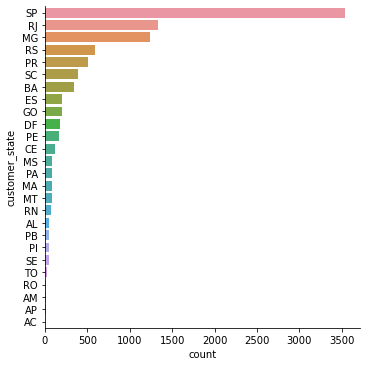

In [306]:
sb.catplot(data = outlierP_customer, y="customer_state", kind="count", order=outlierP_customer["customer_state"].value_counts().index)

### sellerData insights

In [307]:
# discard the columns we already visualised thus don't need anymore
outlierP_customer.drop(columns=["customer_id", "customer_unique_id", "customer_state"], inplace=True)

# remove duplicate products - back to the 129 products
outlierP_customer.drop_duplicates(subset=["product_id"], inplace=True)

outlierP_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 9404
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          129 non-null    object 
 1   product_items_sold  129 non-null    int64  
 2   product_rating      129 non-null    float64
 3   product_polarity    129 non-null    float64
 4   seller_id           129 non-null    object 
dtypes: float64(2), int64(1), object(2)
memory usage: 6.0+ KB


In [308]:
outlierP_seller = outlierP_customer.merge(sellerData, on="seller_id")
outlierP_seller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 128
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          129 non-null    object 
 1   product_items_sold  129 non-null    int64  
 2   product_rating      129 non-null    float64
 3   product_polarity    129 non-null    float64
 4   seller_id           129 non-null    object 
 5   seller_state        129 non-null    object 
 6   seller_items_sold   129 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 8.1+ KB


In [324]:
# check how many sellers have their products among the 'top' 129
print(outlierP_seller["seller_id"].nunique(), "sellers")

# and how many of each product each seller here has
outlierP_seller["seller_id"].value_counts().nlargest(30)

78 sellers


7a67c85e85bb2ce8582c35f2203ad736    6
1025f0e2d44d7041d6cf58b6550e0bfa    5
cc419e0650a3c5ba77189a1882b7556a    5
da8622b14eb17ae2831f4ac5b9dab84a    4
5dceca129747e92ff8ef7a997dc4f8ca    4
a1043bafd471dff536d0c462352beb48    3
620c87c171fb2a6dd6e8bb4dec959fc6    3
53243585a1d6dc2643021fd1853d8905    3
4869f7a5dfa277a7dca6462dcf3b52b2    3
e9779976487b77c6d4ac45f75ec7afe9    3
fa40cc5b934574b62717c68f3d678b6d    3
8581055ce74af1daba164fdbd55a40de    3
1f50f920176fa81dab994f9023523100    3
6560211a19b47992c3666cc44a7e94c0    2
128639473a139ac0f3e5f5ade55873a5    2
4c2b230173bb36f9b240f2b8ac11786e    2
ea8482cd71df3c1969d7b9473ff13abc    2
37be5a7c751166fbc5f8ccba4119e043    2
cab85505710c7cb9b720bceb52b01cee    2
9f505651f4a6abe901a56cdc21508025    2
955fee9216a65b617aa5c0531780ce60    2
8160255418d5aaa7dbdc9f4c64ebda44    2
1c129092bf23f28a5930387c980c0dfc    2
3d871de0142ce09b7081e2b9d1733cb1    2
f8db351d8c4c4c22c6835c19a46f01b0    2
de722cd6dad950a92b7d4f82673f8833    2
669ae81880e0

29 sellers have more than 1 product among the 129, the rest only have one each.

In [329]:
# how many of these sellers are also identified as high-performing based on response 1 (seller_items_sold)?
seller_set = outlierP_seller.merge(outlierSellers[["seller_id"]], on="seller_id")
seller_set

,product_id,product_items_sold,product_rating,product_polarity,seller_id,seller_state,seller_items_sold
0,53b36df67ebb7c41585e8d54d6772e08,327,4.215686,0.129552,7d13fca15225358621be4086e1eb0964,SP,598
1,601a360bd2a916ecef0e88de72a6531a,137,4.243697,0.168678,7a67c85e85bb2ce8582c35f2203ad736,SP,1245
2,f264c1d9b20b5e4a340254d0405e613b,50,4.340000,0.159291,7a67c85e85bb2ce8582c35f2203ad736,SP,1245
3,c6dd917a0be2a704582055949915ab32,122,4.241667,0.150068,7a67c85e85bb2ce8582c35f2203ad736,SP,1245
4,29427de7f8a9ee983d9dbc51cec569b4,97,4.237113,0.159105,7a67c85e85bb2ce8582c35f2203ad736,SP,1245
...,...,...,...,...,...,...,...
61,54d9ac713e253fa1fae9c8003b011c2a,116,4.350877,0.112129,955fee9216a65b617aa5c0531780ce60,SP,1530
62,bdb4be6ce2f7f2b5be0a16088028c7fc,40,4.575758,0.108434,955fee9216a65b617aa5c0531780ce60,SP,1530
63,44fded21627553d1886d459384bbce06,34,4.258065,0.166595,8b321bb669392f5163d04c59e235e066,SP,1031
64,f71f42e2381752836563b70beb542f80,59,4.410714,0.125960,85d9eb9ddc5d00ca9336a2219c97bb13,MG,551


Wow 66 / 78 of the sellers are there.

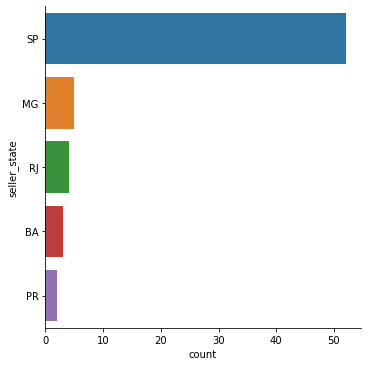

In [330]:
# see their states
sb.catplot(data = seller_set, y="seller_state", kind="count", order=seller_set["seller_state"].value_counts().index)

In [331]:
seller_set["seller_state"].value_counts()

SP    52
MG     5
RJ     4
BA     3
PR     2
Name: seller_state, dtype: int64

In [332]:
outlierP_seller["seller_state"].value_counts()

SP    90
SC     8
MG     8
PR     8
RJ     5
BA     3
PE     2
RS     2
DF     1
GO     1
MT     1
Name: seller_state, dtype: int64

### leadData insights

In [333]:
# discard the columns we already visualised thus don't need anymore
outlierP_seller.drop(columns=["seller_state"], inplace=True)

outlierP_seller.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129 entries, 0 to 128
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_id          129 non-null    object 
 1   product_items_sold  129 non-null    int64  
 2   product_rating      129 non-null    float64
 3   product_polarity    129 non-null    float64
 4   seller_id           129 non-null    object 
 5   seller_items_sold   129 non-null    int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 7.1+ KB


In [334]:
outlierP_lead = outlierP_seller.merge(leadData, on="seller_id")
outlierP_lead.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1 entries, 0 to 0
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              1 non-null      object 
 1   product_items_sold      1 non-null      int64  
 2   product_rating          1 non-null      float64
 3   product_polarity        1 non-null      float64
 4   seller_id               1 non-null      object 
 5   seller_items_sold       1 non-null      int64  
 6   business_segment        1 non-null      object 
 7   lead_type               1 non-null      object 
 8   lead_behaviour_profile  0 non-null      object 
 9   business_type           1 non-null      object 
 10  days_to_first_sale      1 non-null      float64
 11  deal_days               1 non-null      float64
dtypes: float64(4), int64(2), object(6)
memory usage: 104.0+ bytes


Only one seller belongs to the lead dataset...
let's check them out

In [335]:
outlierP_lead

,product_id,product_items_sold,product_rating,product_polarity,seller_id,seller_items_sold,business_segment,lead_type,lead_behaviour_profile,business_type,days_to_first_sale,deal_days
0,53b36df67ebb7c41585e8d54d6772e08,327,4.215686,0.129552,7d13fca15225358621be4086e1eb0964,598,fashion_accessories,online_big,NaN,reseller,6.0,17.0
